<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **10% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Thursday, April 4**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Estimated time**      |  **10 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-1.ipynb` as part of your submission by pushing it to your forked GitLab repository. You need to add your student details below. Any changes to file name will mean your file can't be marked by the auto-grader, resulting in a `zero mark`.


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 

<span style="color:blue">
    
### Student ID :  u5846163

### Student Name: Tien Vu Hoang
</span>

## Introduction

**Bicycle Sharing Systems** are a healthy, cheap and green way to navigate between one place to another. Now with the new generation of electronic registration and sharing, the whole process of transportation, right from the membership to the rental and returning back has become convenient and automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Bike sharing companies like **Mobike**, **OBike** and **AirBike** have grown pretty popular throughout Australia in the past few years, due to them being environment-friendly, pro-health and not to mention, a cheap and convenient mode of transport.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the **duration of travel**, **departure** and **arrival position** is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Data

You have been given a file named **bike-share.csv** which contains a dataset of two years of historical log corresponding to years 2011 and 2012 from **Capital Bikeshare** System, Washington D.C., USA. The dataset has 15 attributes such as **date**, **weekday/weekend/public holiday**, **weather situation**, **temperature** and **the count of number of bikes rented on that day**. Based on this data, our primary aim in this assignment is to visualise and analyse any insights we can get from this data and then predict a trend in the bike rentals.


_Refer to **bike-share-README.txt** for more information on the various attributes present in this data._

In [1]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [38]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
# import sklearn to do linear regression
from scipy import stats as spystats
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import balanced_accuracy_score, mean_squared_error


## LOAD THE DATA

Load the data into a Pandas DataFrame and make it ready for use for analysis and visualization.<span style= 'float: right;'><b>[5 marks]</b></span>

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns so that they make sense to you.
* You might need to cast some of the columns into their appropriate datatypes and/or remove any unnecessary characters that may hinder computation.

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

In [3]:
# Load the csv file
data_bike = pd.read_csv('bike-share.csv',index_col=0)

# rename the columns 
data_bike.columns = ['date','season','year','month','holiday','weekday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']

#slice the data into parts

#this chunk contains continuous variables, this helps with exploratory data analysis later on
data_bike_continuous = data_bike.iloc[:,8:]

# separate into 2011 and 2012 data to detect any difference between two years.
data_bike_2011 = data_bike[data_bike['year'] == 0]
data_bike_2012 = data_bike[data_bike['year'] == 1]

#reindex the for data point of year 2012 for plotting purpose
data_bike_2012.index = data_bike_2012.index - 365

data_bike.head()


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


After loading the data, I renamed the column to make the data more comprehensive

<span style="color:blue">

### END OF LOAD THE DATA

</span>

## EXPLORATORY DATA ANALYSIS

In this section you are expected to do an exploratory data analysis on the dataset that you've just loaded and readied. <span style= 'float: right;'><b>[15 marks]</b></span>

**HINTS** -

* Explore your data both statistically and visually, in order to find some statistical insights about your data.
* Announce some descriptive stats on your data and explain what they mean in the context of this dataset.

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
date          731 non-null object
season        731 non-null int64
year          731 non-null int64
month         731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weather       731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
humidity      731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
count         731 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


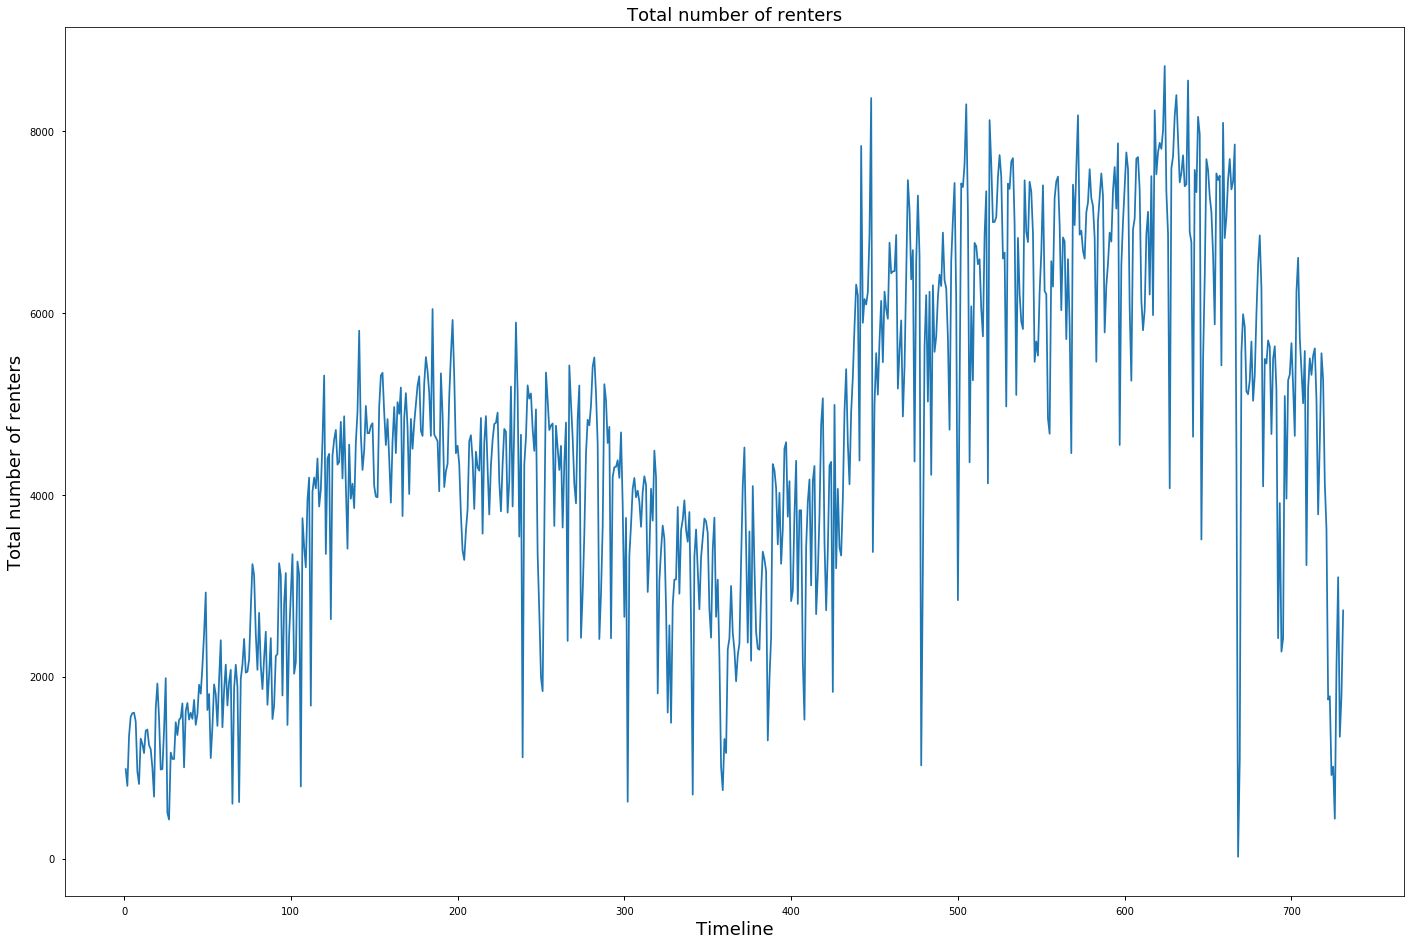

In [4]:
# YOUR CODE HERE
# quickly summarize data info/ types/ size
data_bike.info()

#plot the trend in total number of renters, which is the focus of this assignment (variable that we want to predict)
fig = plt.figure(figsize=(24,16))
plt.plot(data_bike.index,data_bike['count'])
plt.title("Total number of renters", fontsize =18)
plt.xlabel("Timeline", fontsize =18)
plt.ylabel("Total number of renters",fontsize =18)
plt.show()


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

First off, I would like to examine our dependent variable to see the general trend of total bike rents as time passed. From the line plot presented above, we can see that the total count for bike rents increased significantly from year 1 to year 2. The second half of the plot (right-side, represents year 2011) seems to contain observations with much higher counts as compared to the left-side of the plot (year 2012)

Moreover, time seems to be an important factor to the number of bike rents. As we can see from the plot, the number of rents is low at both end of the graph (day [0, 50], and day [700 onwards]. Furthermore, we can only observe a trough between day 300 and 400. Thus, without examining other data set, my first impression with our dependent varible is that it has a cyclical nature. It seems demands peak in the middle of the year and goes down during the end-of-year and start-of-new-year period. 

To have a better understanding of this pattern, I plot two other plots of casual and registered users separately.

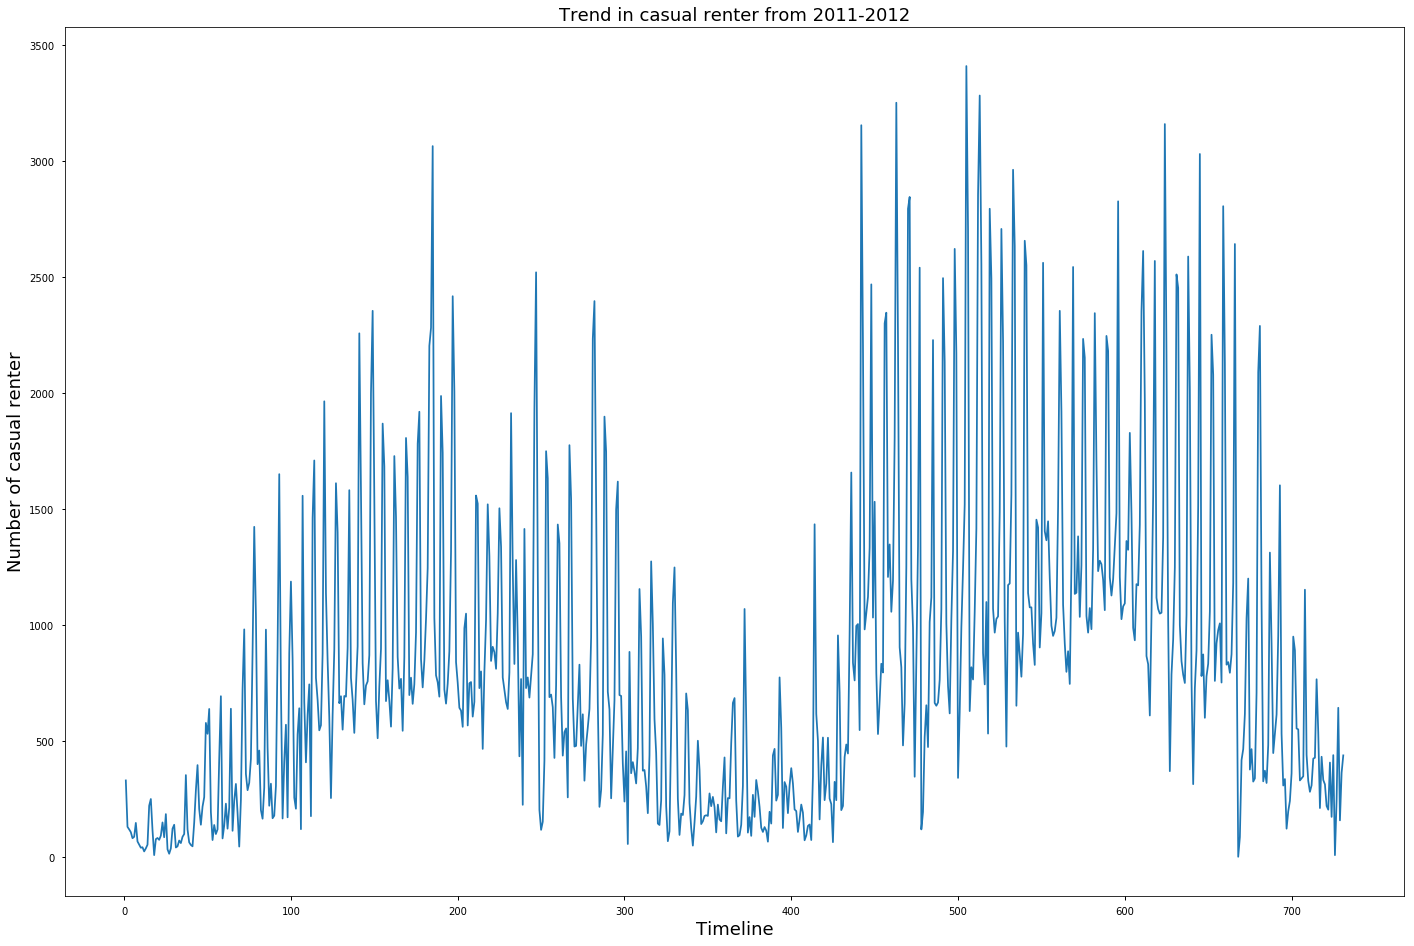

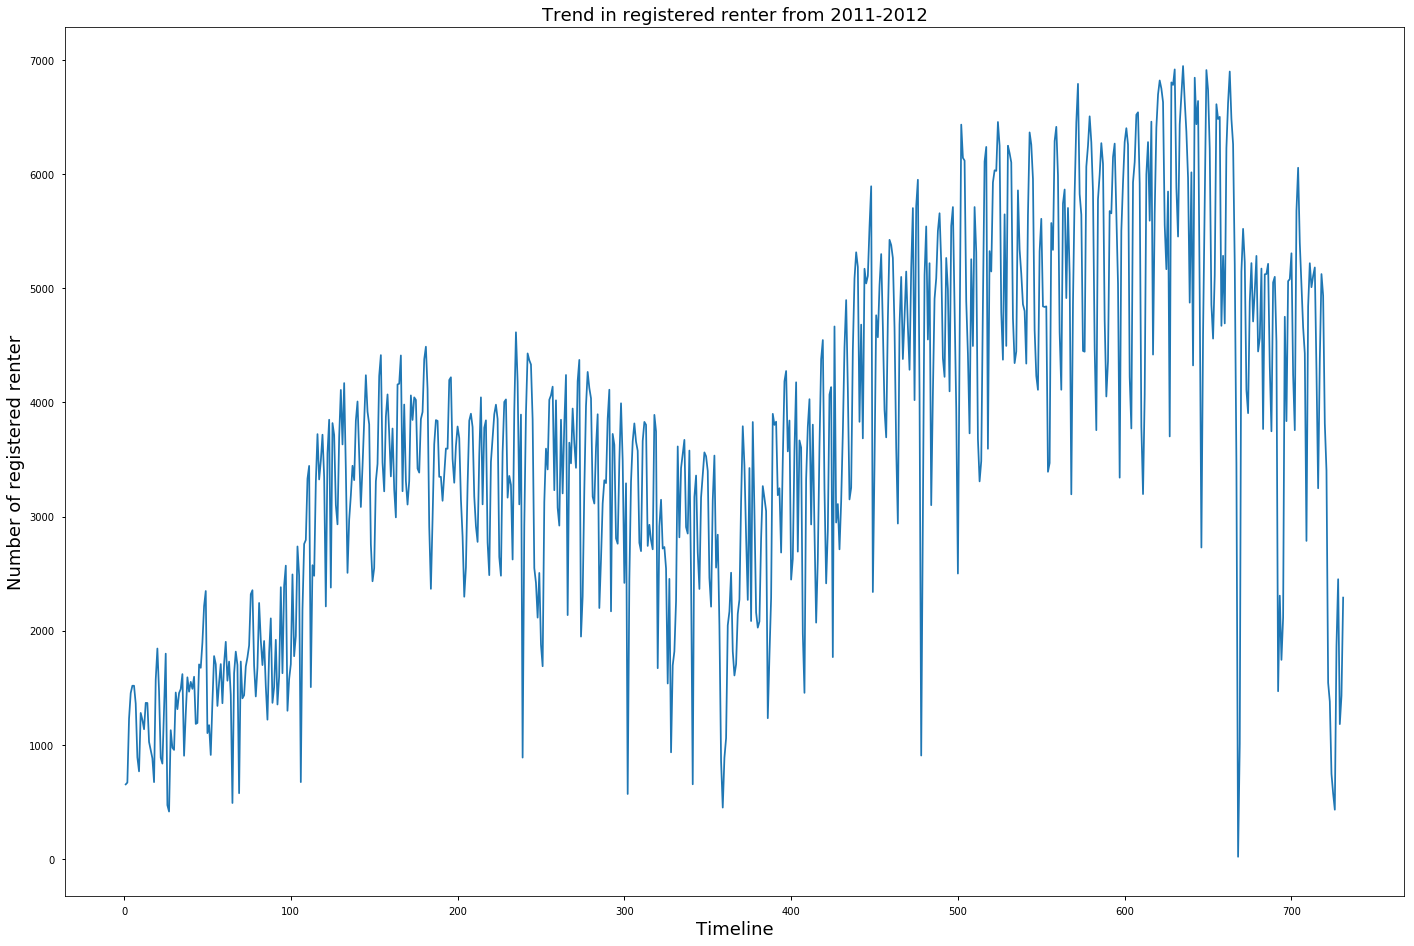

In [39]:
# plot of casual bike users, by day from 1/1/2011 to 31/12/2012
fig2 = plt.figure(figsize=(24,16))
plt.plot(data_bike.index,data_bike['casual'])
plt.title("Trend in casual renter from 2011-2012", fontsize =18)
plt.xlabel("Timeline", fontsize =18)
plt.ylabel("Number of casual renter",fontsize =18)

# plot of registered bike users, by day from 1/1/2011 to 31/12/2012
fig3 = plt.figure(figsize=(24,16))
plt.plot(data_bike.index,data_bike['registered'])
plt.title("Trend in registered renter from 2011-2012", fontsize =18)
plt.xlabel("Timeline", fontsize =18)
plt.ylabel("Number of registered renter", fontsize =18)
plt.show()


These two plots give us a very interesting insight into the increase in total number of rents. As we can see from the first plot, the total number of casual bike renters does not seem to change much from 2011 to 2012. On the other hand, the plot for registered renters shows a significant increase from 2011 to 2012. Thus it seems that number of registered renters is the key driver of the increase in total number of rents.

Moreover, both of these plots present the same pattern as observed earlier, which is that demand peaks in the middle of the year and goes down during the end-of-year and start-of-new-year period.

In [43]:
# break down the counts of renters to check whether our observation from the plots is valid
summary2011 = data_bike_2011[['count','casual','registered']].agg(['mean','median','max','min'])
summary2012 = data_bike_2012[['count','casual','registered']].agg(['mean','median','max','min'])

print("Summary of bike rented statistics for year 2011 " + "\n", summary2011)
print("Summary of bike rented statistics for year 2012 " + "\n", summary2012)


Summary of bike rented statistics for year 2011 
               count      casual   registered
mean    3405.761644   677.40274  2728.358904
median  3740.000000   614.00000  2915.000000
max     6043.000000  3065.00000  4614.000000
min      431.000000     9.00000   416.000000
Summary of bike rented statistics for year 2012 
               count       casual  registered
mean    5599.934426  1018.483607  4581.45082
median  5927.000000   904.500000  4776.50000
max     8714.000000  3410.000000  6946.00000
min       22.000000     2.000000    20.00000


From this breakdown of data, it is clear that our observation was valid.

Renting bike becomes more popular in year 2012, as seen from the significantly higher means. Moreover, the numbers of both casual and registered users increase, but the increase in registered users is more pronounced. This observation can be visualized by the following plot.


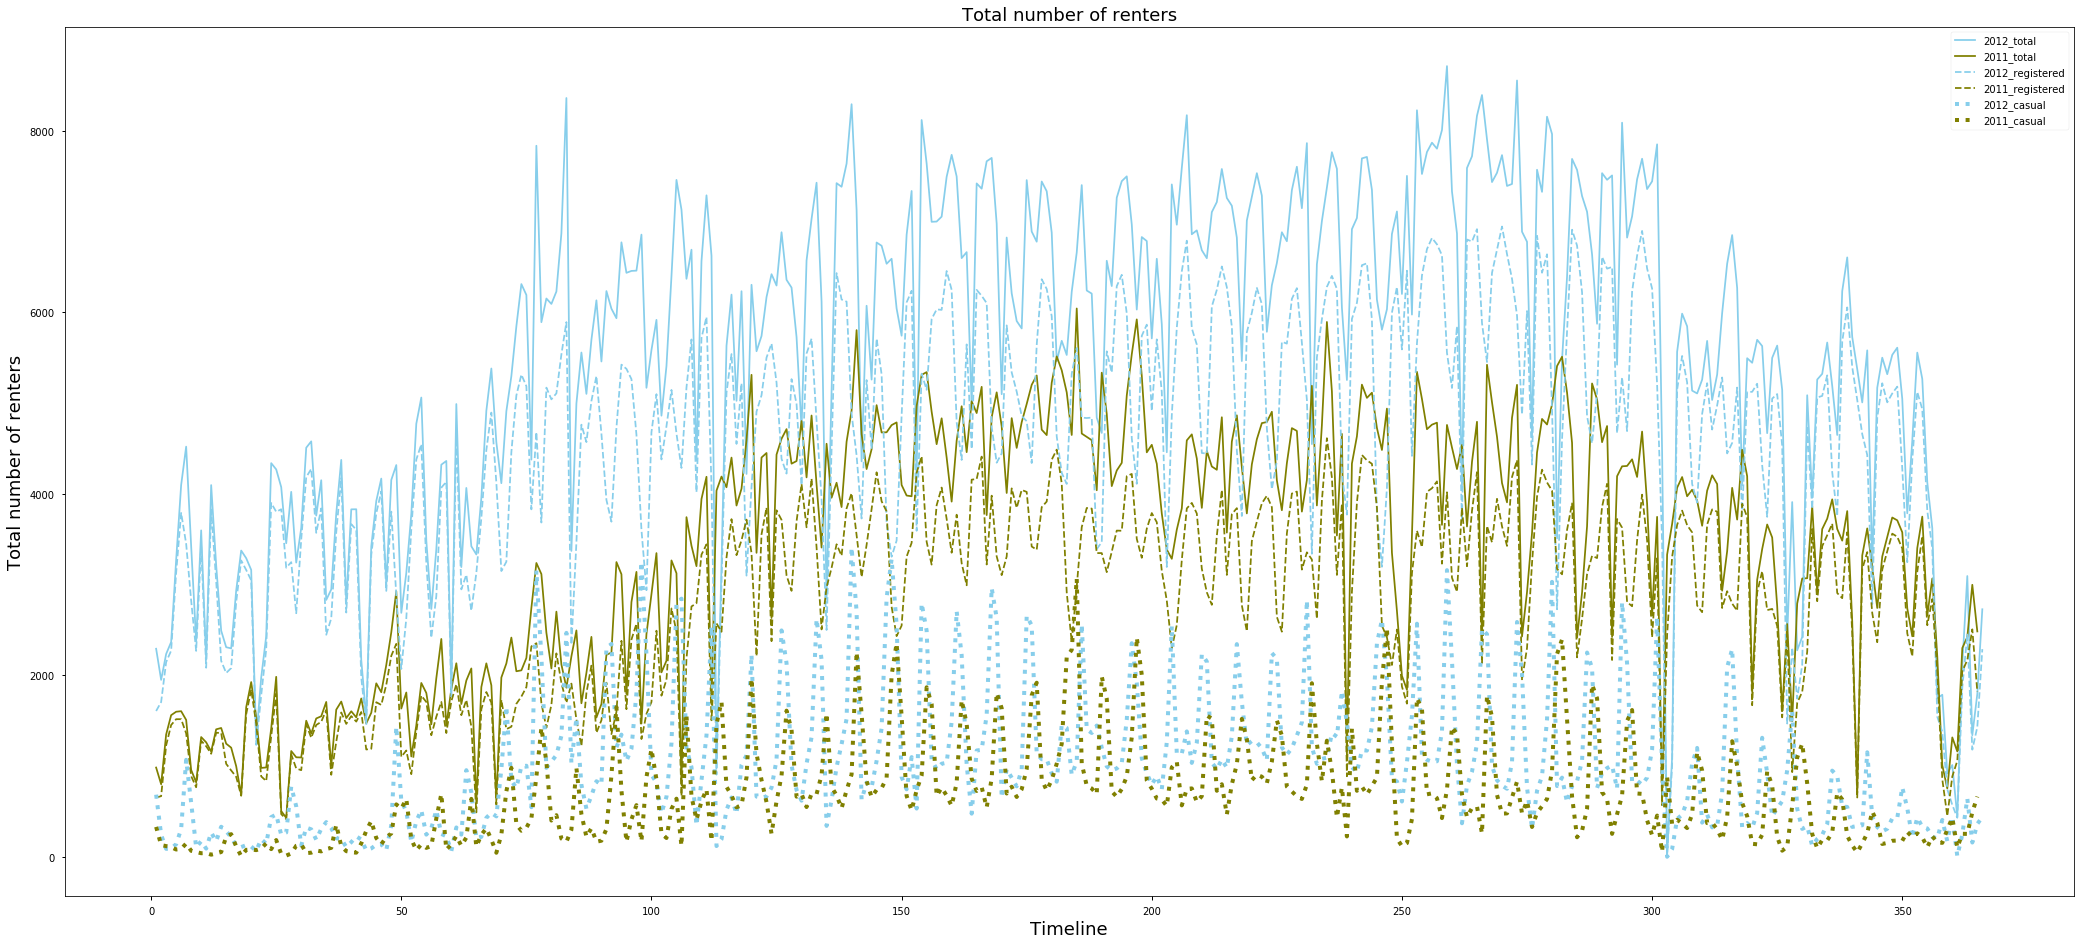

In [7]:
# visualise the increase in total number of renters, number of casual renters, number of registered renters, separated by years
count_visual = plt.figure(figsize=(36,16))

plt.plot(data_bike_2012.index, data_bike_2012['count'], color='skyblue', label = '2012_total')
plt.plot(data_bike_2011.index, data_bike_2011['count'], color='olive', label = '2011_total')
plt.plot(data_bike_2012.index, data_bike_2012['registered'], color='skyblue', label = '2012_registered', linestyle='dashed')
plt.plot(data_bike_2011.index, data_bike_2011['registered'], color='olive', label = '2011_registered', linestyle='dashed')
plt.plot(data_bike_2012.index, data_bike_2012['casual'], color='skyblue', label = '2012_casual', linestyle=':',linewidth=4)
plt.plot(data_bike_2011.index, data_bike_2011['casual'], color='olive', label = '2011_casual', linestyle=':',linewidth=4)
plt.title("Total number of renters", fontsize =18)
plt.xlabel("Timeline", fontsize =18)
plt.ylabel("Total number of renters",fontsize =18)
plt.legend()

plt.show()


In [8]:
# getting a quick statiscal description of continuous variables
data_bike_continuous.describe()


,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Then, we examine the data for for our continuous variables.

From this table, there is nothing that truly stands out. Our continuous variables seems to be standard and reasonable. All the means are close to medians, which means our data set are not skewed. 

Temperature and feeling temperature also seems to follow a very similar distribution, thus, for later analysis, I might want to select either one instead of include both variables since it will be redundant. 

In [9]:
# find the correlation between continuous variables 
data_bike_continuous.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
humidity,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
count,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


Studying correlation is really helpful in helping us determine the relationship between variables. 

From the summary, we can see that temperature and total number of rents has a positive correlation, and it has a pretty high value of 0.627494. Thus, it means that higher temperature would bring about more renter. Thus, we should expect to see more rents in warm day, and warm seaon like summer/ autumn. 

Both humidity and windspeed has a negative relationship to the total number of renter. So, on a humid and windy day, we should expect few bike renters. It is also intuitive since these 2 conditions also means it is more likely to rain and as such, fewer people would cycle. 

In [10]:
# separate continous variables from data frame.
continuous_2011 = data_bike_2011.iloc[:,8:]
continuous_2012 = data_bike_2012.iloc[:,8:]

#produce summaries of statistics for continuous variables for year 2011, 2012
print("Summary of continuous variables for year 2011: ")
print(continuous_2011.describe())
print("Summary of continuous variables for year 2012: ")
print(continuous_2012.describe())

Summary of continuous variables for year 2011: 
             temp       atemp    humidity   windspeed       casual  \
count  365.000000  365.000000  365.000000  365.000000   365.000000   
mean     0.486665    0.466835    0.643665    0.191403   677.402740   
std      0.189596    0.168836    0.148744    0.076890   556.269121   
min      0.059130    0.079070    0.000000    0.022392     9.000000   
25%      0.325000    0.321954    0.538333    0.135583   222.000000   
50%      0.479167    0.472846    0.647500    0.186900   614.000000   
75%      0.656667    0.612379    0.742083    0.235075   871.000000   
max      0.849167    0.840896    0.972500    0.507463  3065.000000   

        registered        count  
count   365.000000   365.000000  
mean   2728.358904  3405.761644  
std    1060.110413  1378.753666  
min     416.000000   431.000000  
25%    1730.000000  2132.000000  
50%    2915.000000  3740.000000  
75%    3632.000000  4586.000000  
max    4614.000000  6043.000000  
Summary of cont

By quickly skimming through both summaries, I do not notice any significant differences in continuous variables that reflect weather conditions. The weather condition is more or less around the same.

Thus, this finding has an important implication. The increase in number of rents from 2011 to 2012 does not seem to depend on weather condition. Moreover, given that working and holiday calendar are somewhat similar for every year, we should expect that the changes in number of rents is driven by some other factors that might not be in our data set. Thus, if we want to predict the sales/ rents number for 2013, it does not seem that this data set will suffice.

Coming up next, I will explore the relationship between variables which are factors and total number of rents using bar plot and boxplot.

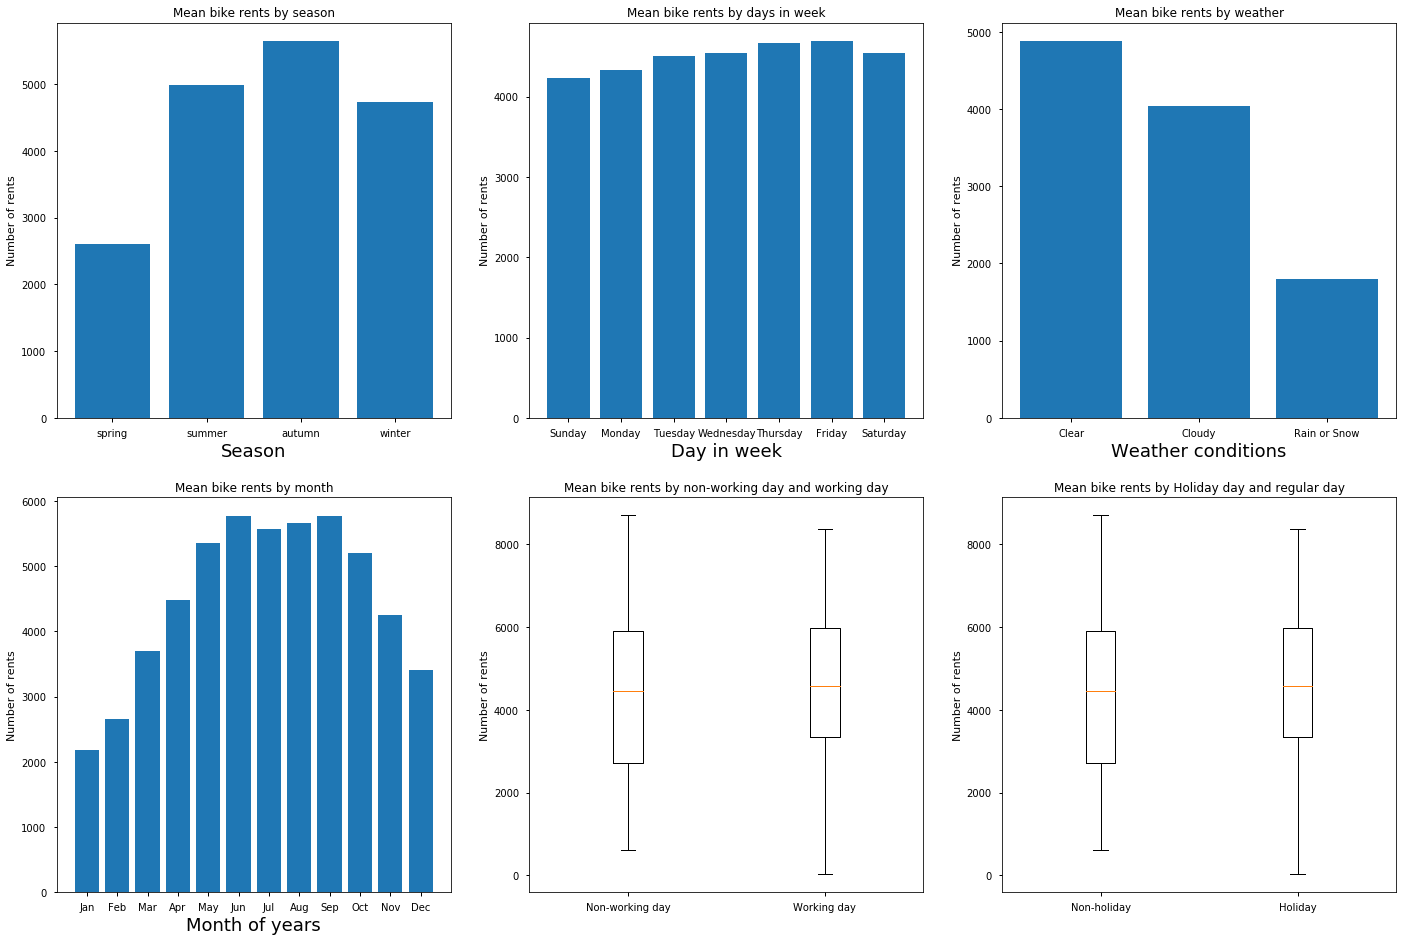

In [11]:
factor_plot = plt.figure(figsize=(24,16))

# separate total number of bike rented by season
ax1 = factor_plot.add_subplot(231)
mean_by_season = data_bike.groupby('season')['count'].mean()
ax1.bar(['spring','summer','autumn','winter'],mean_by_season)
ax1.set_title("Mean bike rents by season")
ax1.set_xlabel("Season", fontsize = 18)
ax1.set_ylabel("Number of rents")

# separate total number of bike rented by days of the week
ax2 = factor_plot.add_subplot(232)
mean_by_weekday = data_bike.groupby('weekday')['count'].mean()
ax2.bar(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],mean_by_weekday)
ax2.set_title("Mean bike rents by days in week")
ax2.set_xlabel("Day in week",fontsize = 18)
ax2.set_ylabel("Number of rents")

# separate total number of bike rented by weather conditions
ax3 = factor_plot.add_subplot(233)
mean_by_weather = data_bike.groupby('weather')['count'].mean()
ax3.bar(['Clear','Cloudy','Rain or Snow'],mean_by_weather)
ax3.set_title("Mean bike rents by weather")
ax3.set_xlabel("Weather conditions", fontsize = 18)
ax3.set_ylabel("Number of rents")

# separate total number of bike rented by months
ax4 = factor_plot.add_subplot(234)
mean_by_month = data_bike.groupby('month')['count'].mean()
ax4.bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],mean_by_month)
ax4.set_title("Mean bike rents by month")
ax4.set_xlabel("Month of years", fontsize = 18)
ax4.set_ylabel("Number of rents")

# separate total number of bike rented by whether it is a working day or non-working day
ax5 = factor_plot.add_subplot(235)

data_by_workingday = [data_bike[data_bike['workingday']==0]['count'].tolist(), data_bike[data_bike['workingday']==1]['count'].tolist()]
ax5.boxplot(data_by_workingday, labels = ['Non-working day','Working day'])
ax5.set_title("Mean bike rents by non-working day and working day")
ax5.set_ylabel("Number of rents")

# separate total number of bike rented by whether it is a holiday or non-holiday

ax6 = factor_plot.add_subplot(236)

data_by_holiday = [data_bike[data_bike['holiday']==0]['count'].tolist(), data_bike[data_bike['holiday']==1]['count'].tolist()]
ax6.boxplot(data_by_workingday, labels = ['Non-holiday','Holiday'])
ax6.set_title("Mean bike rents by Holiday day and regular day")
ax6.set_ylabel("Number of rents")

plt.show()

I plot the mean of rents for each season, day in week, weather conditions category and months of year using bar plots.

For working day and non-working day, holiday and non-holiday, I use boxplot to demonstrate the distribution of total number of rents.

General findings from these plots:

- Summer and autumn have most number of rents. Spring is the season with lowest number of users
- Generally, days in week have somewhat similar average number of users with Monday and Sunday having the lowest number of rents. Saturday, despite being a non-working day, have higher average number of users as compared to Monday and Tuesday
- People will rent more on the day with favorable weathers such as clear skies or cloudy. It is intuitive to expect bad weather (rain or snow) brings about fewer users.
- Confirming my earlier observation, trend in rent is cyclical through out the year as demand peaks in summer/autumn (probably due to nicer weather) and drops significantly during the end-of-year, new-year period (which includes heaps of holidays and the cold weather during winter/ early spring also tends to be less favourable)
- The median number of users for non-working and working days are similar, around 4400-4500. Nonetheless, the 1st quartile of number of user during non-working day is much lower as compared to working day, resulting in a larger the interquartile range. Thus, we can see that most of the low-demand day coming from non-working day and the number of users is less preditable for non-working day.
- For holiday category, median number of user for holiday is significantly lower. Furthermore, the 1st quartile for holiday also much lower than that of non-holiday and holiday seems to observe a larger interquartile range in number of users. Even though days with lowest demand coming from non-holiday, we can still see that holiday generally have a lower demand for bike rent than non-holiday.

In [44]:
# provide summaries of statistics for working days/ non-working days/ holidays and non-holidays
non_working_statistics = data_bike[data_bike['workingday'] == 0]['count'].describe()
working_statistics = data_bike[data_bike['workingday'] == 1]['count'].describe()
non_holiday_statistics = data_bike[data_bike['holiday'] == 0]['count'].describe()
holiday_statistics = data_bike[data_bike['holiday'] == 1]['count'].describe()


print("Statistics for non working day:")
print(non_working_statistics)
print("Statistics for working day:")
print(working_statistics)
print("Statistics for non-holiday:")
print(non_holiday_statistics)
print("Statistics for holiday:")
print(holiday_statistics)

Statistics for non working day:
count     231.000000
mean     4330.168831
std      2052.141245
min       605.000000
25%      2710.500000
50%      4459.000000
75%      5907.500000
max      8714.000000
Name: count, dtype: float64
Statistics for working day:
count     500.000000
mean     4584.820000
std      1878.415583
min        22.000000
25%      3344.250000
50%      4582.000000
75%      5987.500000
max      8362.000000
Name: count, dtype: float64
Statistics for non-holiday:
count     710.000000
mean     4527.104225
std      1929.013947
min        22.000000
25%      3214.000000
50%      4558.000000
75%      5932.750000
max      8714.000000
Name: count, dtype: float64
Statistics for holiday:
count      21.00000
mean     3735.00000
std      2103.35066
min      1000.00000
25%      1951.00000
50%      3351.00000
75%      6034.00000
max      7403.00000
Name: count, dtype: float64


Looking at the 25th percentile for all the summaries of data, there is even more evidence to support the observation that I stated earlier, which is most of the low demand days are either holidays or non-working days.

<span style="color:blue">

### END OF EXPLORATORY DATA ANALYSIS

</span>

## DATA ANALYSIS

In this section, use your data slicing and dicing skills to come up with specialised analysis on a subset of the data. Let's see if you can answer these specific analysis questions. You are expected to plot appropriate graphs / plots and explain your analysis (using Markdown text) wherever necessary. 

### 1. Is there any relationship between weather situation / outside temperature and the number of bikes rented on a given day? 
<span style= 'float: right;'><b>[10 marks]</b></span>

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

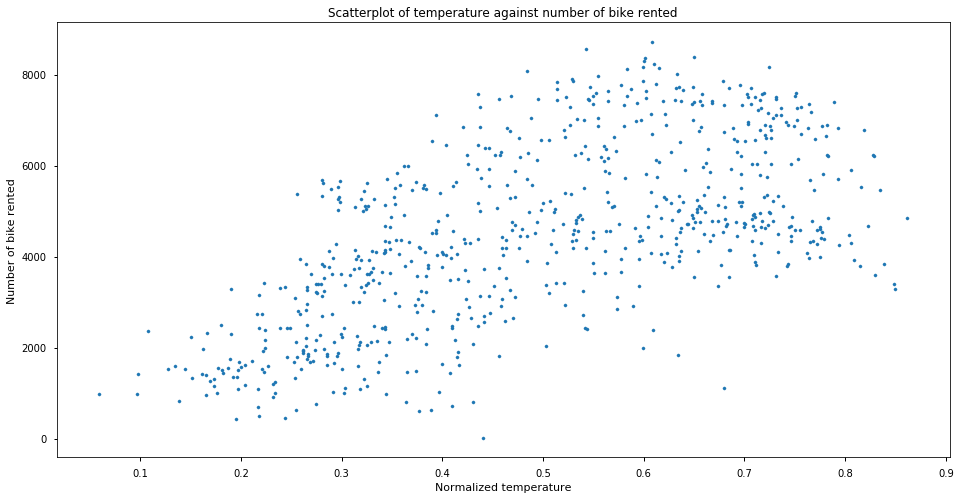

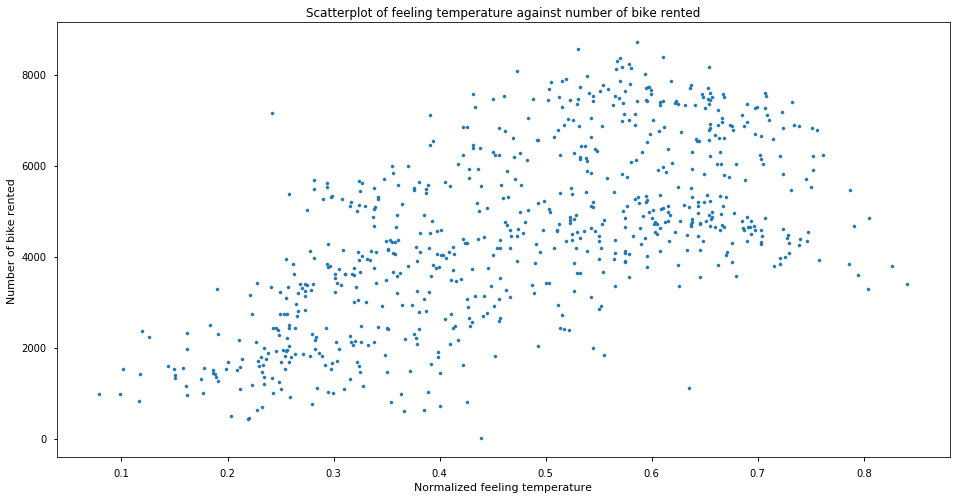

In [45]:
# Scatterplot for temperature against number of bike rented
tempvscount_plot = plt.figure(figsize=(16,8))


plt.scatter(data_bike['temp'],data_bike['count'],s=10)
plt.title("Scatterplot of temperature against number of bike rented")
plt.ylabel("Number of bike rented")
plt.xlabel("Normalized temperature")
plt.show()

# Scatterplot for feeling temperature against number of bike rented
atempvscount_plot = plt.figure(figsize=(16,8))


plt.scatter(data_bike['atemp'],data_bike['count'],s=10)
plt.title("Scatterplot of feeling temperature against number of bike rented")
plt.ylabel("Number of bike rented")
plt.xlabel("Normalized feeling temperature")
plt.show()


From both plots, we can observe an obvious relationship between temperature and number of bike rented. As temperature increases, it seems that there are more bike rented as well. Even though our data points spread out more for high temperature days, generally, most of the days with lowest demand for bike renting are low temperature days.

Refer back to the exploratory data analysis, this plot is somewhat expected as I have found a large positive correlation between temperature and number of bike rented.

Then, I plot another plot that separate casual and registered users to examine the effect temparature has on these two groups


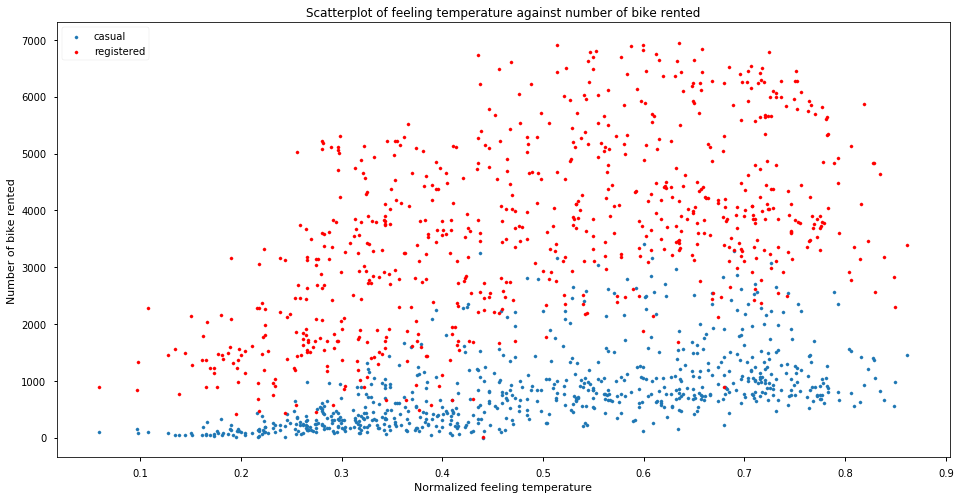

In [46]:
#Scatterplot for temperature against number of casual.registered users
seperatecount_plot = plt.figure(figsize=(16,8))

plt.scatter(data_bike['temp'],data_bike['casual'],s=10)
plt.scatter(data_bike['temp'],data_bike['registered'],s=10, color='red')
plt.title("Scatterplot of feeling temperature against number of bike rented")
plt.ylabel("Number of bike rented")
plt.xlabel("Normalized feeling temperature")
plt.legend(loc=2)
plt.show()

After separating the dataset into casual (blue color) and registered (red color) users, we can see that our observation holds for both group, which is "an increase in temperature will lead to an increase in number of bike rents".

Another observation we can draw from this graph is that on days with low temperature, the number of casual users seem to be very low and most users on that day are registered users. It seems that registered users are more dependent on renting bike as the main means of transportation and as such, they still have to use bike during cold day. Casual users, on the other hand, have more alternatives and might refer to other means of transportation if needed.


Now, let's examine the potential relationship between weather condition and number of bike rented. From our exploratory data analysis, it is clear that nice weather would mean more bike rented. But we have not performed any formal statistics tests. Thus to check if nice weather is truly beneficial for bike renting business. I perform the following t-tests.

In [52]:
#ttest for clear skies vs cloudy weather
t_weather12 = spystats.ttest_ind(data_bike[data_bike['weather'] == 1]['count'], data_bike[data_bike['weather'] == 2]['count'])
#ttest for clear skies vs light rain or snow weather
t_weather13 = spystats.ttest_ind(data_bike[data_bike['weather'] == 1]['count'], data_bike[data_bike['weather'] == 3]['count'])
#ttest for cloudy vs light rain or snow weather
t_weather23 = spystats.ttest_ind(data_bike[data_bike['weather'] == 2]['count'], data_bike[data_bike['weather'] == 3]['count'])

print("T-test output for clear skies vs cloudy weather: " + "\n", t_weather12)
print("T-test output for clear skies vs light rain or snow weather: " + "\n", t_weather13)
print("T-test output for cloudy vs light rain or snow weather: " + "\n", t_weather23)


T-test output for clear skies vs cloudy weather: 
 Ttest_indResult(statistic=5.752335517396086, pvalue=1.3098546508615235e-08)
T-test output for clear skies vs light rain or snow weather: 
 Ttest_indResult(statistic=7.4168437938175344, pvalue=5.446215924896285e-13)
T-test output for cloudy vs light rain or snow weather: 
 Ttest_indResult(statistic=5.540669513783013, pvalue=7.241695029624094e-08)


From the ttests, our p-values are close to zero, which means that we reject all the null hyphotheses, which state that the average number of bikes rented are the same for all the pairs of weather conditions examined.

Thus, we have sufficient evidence to conclude that weather conditions do affect the number of rented bike and we might want to include weather condition in regression model which predicts number of bike rented.

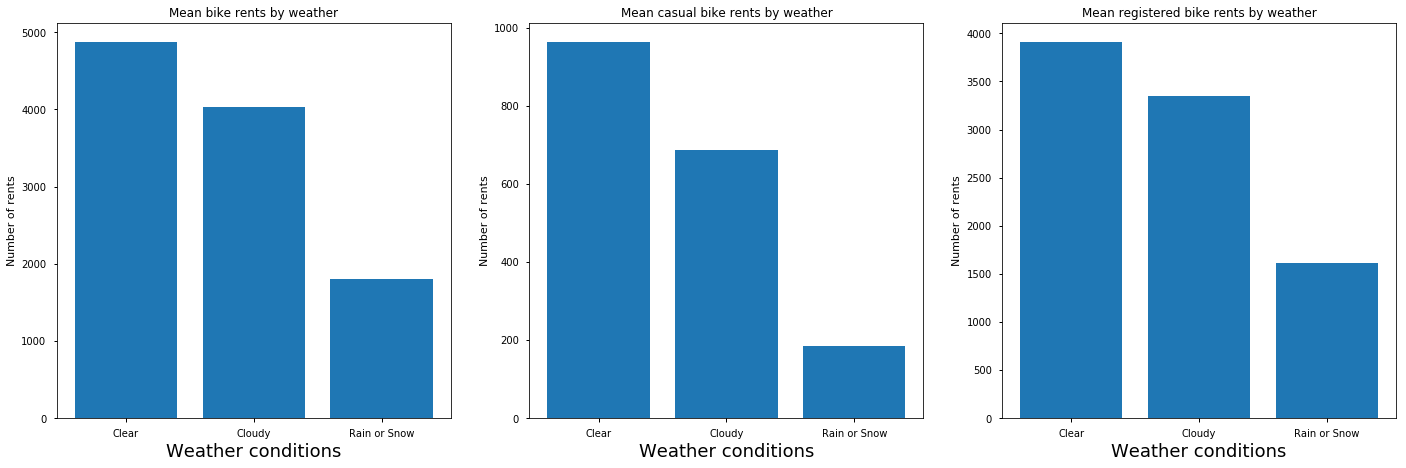

In [16]:
weather_plot = plt.figure(figsize=(24,16))

#Bar plot of means number of total users by weather condition catergory
ax11 = weather_plot.add_subplot(231)
mean_by_weather = data_bike.groupby('weather')['count'].mean()
ax11.bar(['Clear','Cloudy','Rain or Snow'],mean_by_weather)
ax11.set_title("Mean bike rents by weather")
ax11.set_xlabel("Weather conditions", fontsize = 18)
ax11.set_ylabel("Number of rents")

#Bar plot of means number of casual users by weather condition catergory
ax12 = weather_plot.add_subplot(232)
casual_by_weather = data_bike.groupby('weather')['casual'].mean()
ax12.bar(['Clear','Cloudy','Rain or Snow'],casual_by_weather)
ax12.set_title("Mean casual bike rents by weather")
ax12.set_xlabel("Weather conditions", fontsize = 18)
ax12.set_ylabel("Number of rents")

#Bar plot of means number of registered users by weather condition catergory
ax13 = weather_plot.add_subplot(233)
registered_by_weather = data_bike.groupby('weather')['registered'].mean()
ax13.bar(['Clear','Cloudy','Rain or Snow'],registered_by_weather)
ax13.set_title("Mean registered bike rents by weather")
ax13.set_xlabel("Weather conditions", fontsize = 18)
ax13.set_ylabel("Number of rents")

plt.show()

Furthermore, when we separate dataset into casual and registered users, it seem that the impact of weather conditions change in registered user is less severe. As evidence from our plot, for casual users, their demand during rainy or snowy day is only approximately 200/100 = 20% of the demand on day with nice weather (waether = 1, clear skies). On the other hand, for registered user, the average user on rainy day is 1500/3800 = 39.5% of the demand on day with nice weather. 

From these plots, we can see that the demand by casual renters is more sensitive to the bad weather.

<span style="color:blue">

### END OF DATA ANALYSIS QUESTION 1

</span>

### 2. Is there any relationship between the day of the week / holiday and the number of bikes rented on a given day?
<span style= 'float: right;'><b>[10 marks]</b></span>

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

Generally, as we have described ealier in the exploratory data analysis, the average number of rented bikes is pretty consistent across the weak, with Monday and Sunday having the lowest number of users.

The boxplot we plotted also shows that the number of user is more varying during holiday and the summary statistics also suggest that there are fewer users on holidays.

Nonetheless, referring back to the summaries statistics of rented bikes on holiday and non-holiday, we should note that there are only 21 holidays in our dataset. Given its small sample size, it is difficult to perform any robust statistic tests on the average rented bikes between holidays and non-holidays. Thus, for this part, I will only perform statiscal tests to examine the relationship between day of the week and number of bikes rented.

In [53]:
# ANOVA to test if there are differences in the average number of bike rented, across the week
ANOVA_result = spystats.f_oneway(data_bike[data_bike['weekday']==0]['count'],data_bike[data_bike['weekday']==1]['count'],data_bike[data_bike['weekday']==2]['count'],
                                data_bike[data_bike['weekday']==3]['count'],data_bike[data_bike['weekday']==4]['count'],data_bike[data_bike['weekday']==5]['count'],data_bike[data_bike['weekday']==6]['count'])
ANOVA_result


F_onewayResult(statistic=0.7828624296214937, pvalue=0.583494082505154)

Given our very high p-value of 0.583, we do not have sufficient evidence to reject our null hypothesis and thus, there is no statistically significant difference amongst the average bike rents between the days of week. 

Therefore, despite the obvious difference in our bar plot, strictly speaking, the days of week have no significant difference in number of users. But what about the influence of days in week on number of users if we separate the data into casual and registered users?

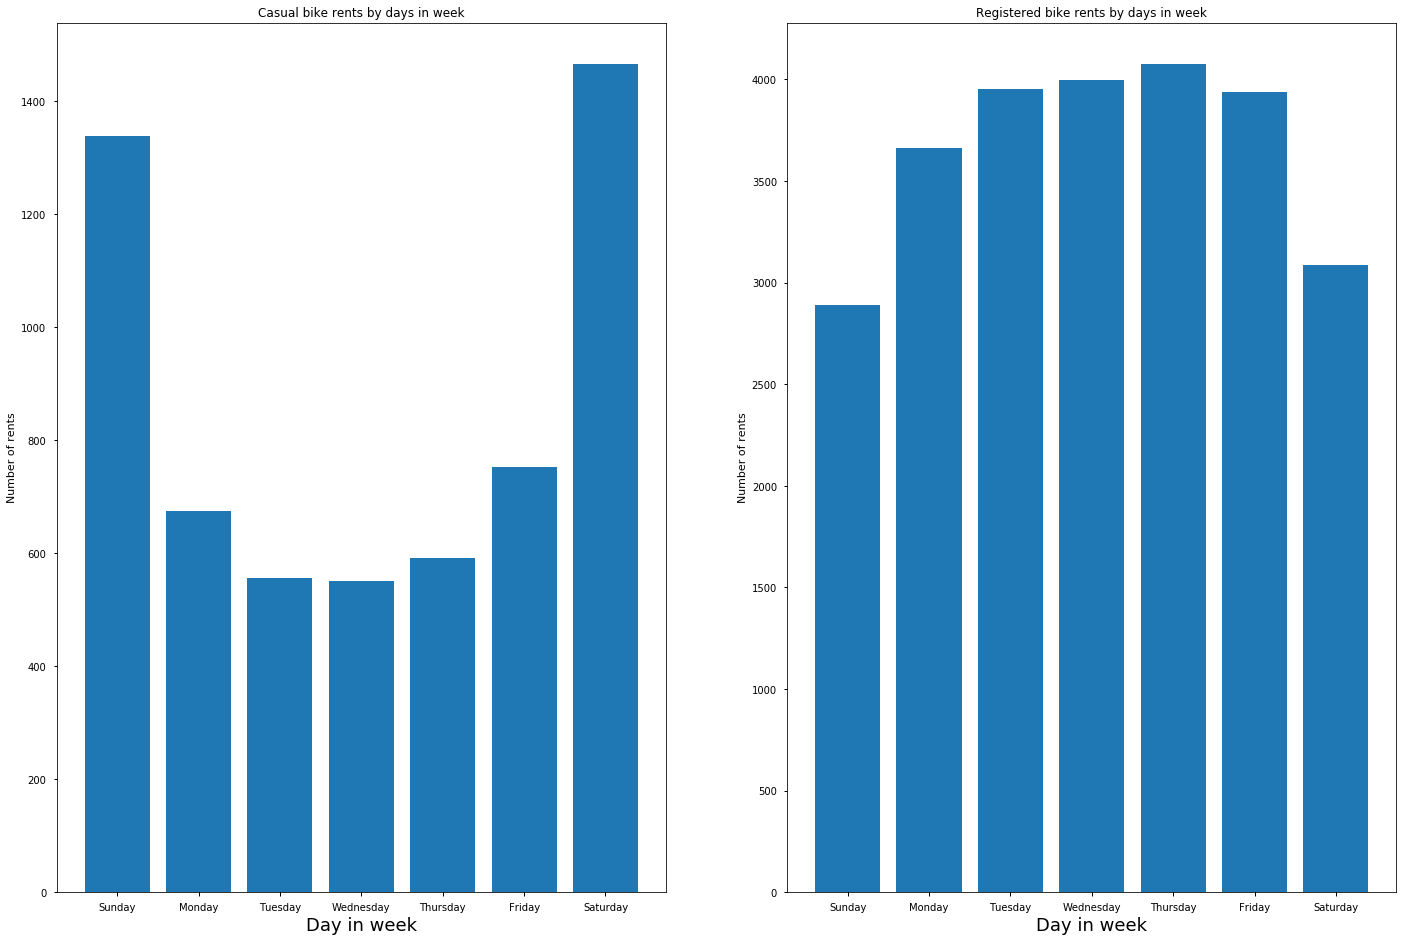

In [18]:
weekday_plot = plt.figure(figsize=(24,16))

#Average casual users by days of weeks
ax21 = weekday_plot.add_subplot(121)
casual_by_weekday = data_bike.groupby('weekday')['casual'].mean()
ax21.bar(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],casual_by_weekday)
ax21.set_title("Casual bike rents by days in week")
ax21.set_xlabel("Day in week",fontsize = 18)
ax21.set_ylabel("Number of rents")

#Average registered users by days of weeks
ax22 = weekday_plot.add_subplot(122)
registered_by_weekday = data_bike.groupby('weekday')['registered'].mean()
ax22.bar(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],registered_by_weekday)
ax22.set_title("Registered bike rents by days in week")
ax22.set_xlabel("Day in week",fontsize = 18)
ax22.set_ylabel("Number of rents")

plt.show()

These two plots display a very interesting finding, while the average number of casual users throughout the week remains pretty consistent, the average number of casual users increase significantly on weekends (Saturday and Sunday).

In contrast, while the average number of registered users throughout the week remains pretty consistent, the average number of registered users decrease significantly on weekends (Saturday and Sunday).

This might suggest that the two groups use bike for different purposes. The registered might use bike for work, while casual user might use bike for recreational purpose or occasional travel.

I perform two other anova to see if there are any differences in number of casual/registered users throughout the week.




In [54]:
#ANOVA test if there are difference in means of casual users between different days of the week
ANOVA_casual_result = spystats.f_oneway(data_bike[data_bike['weekday']==0]['casual'],data_bike[data_bike['weekday']==1]['casual'],data_bike[data_bike['weekday']==2]['casual'],
                                data_bike[data_bike['weekday']==3]['casual'],data_bike[data_bike['weekday']==4]['casual'],data_bike[data_bike['weekday']==5]['casual'],data_bike[data_bike['weekday']==6]['casual'])

#ANOVA test if there are difference in means of registered users between different days of the week
ANOVA_registered_result = spystats.f_oneway(data_bike[data_bike['weekday']==0]['registered'],data_bike[data_bike['weekday']==1]['registered'],data_bike[data_bike['weekday']==2]['registered'],
                                data_bike[data_bike['weekday']==3]['registered'],data_bike[data_bike['weekday']==4]['registered'],data_bike[data_bike['weekday']==5]['registered'],data_bike[data_bike['weekday']==6]['registered'])

print("ANOVA output for casual users:")
print(ANOVA_casual_result)
print("ANOVA output for registered users:")
print(ANOVA_registered_result)





ANOVA output for casual users:
F_onewayResult(statistic=45.51837256223601, pvalue=2.4090306401394115e-47)
ANOVA output for registered users:
F_onewayResult(statistic=10.620446505894412, pvalue=2.5188087351376627e-11)


This output strengthens the conclusion drawn from the plots above. The near-zero p-values of both ANOVA signify that there are differences in average users throughout the week for both casual and registered users.

As we can see, even though the there is no statistically significant difference in average number of total users throughout the week, there are statiscal differences if we separate the data into casual and registered users. This piece of information suggest that for any high accuracy prediction of number of users, we might want to separate the two customers group and the days in week affect them differently.

Now, I will do some further visualization to analyze impact of holiday on both casual and registered users.

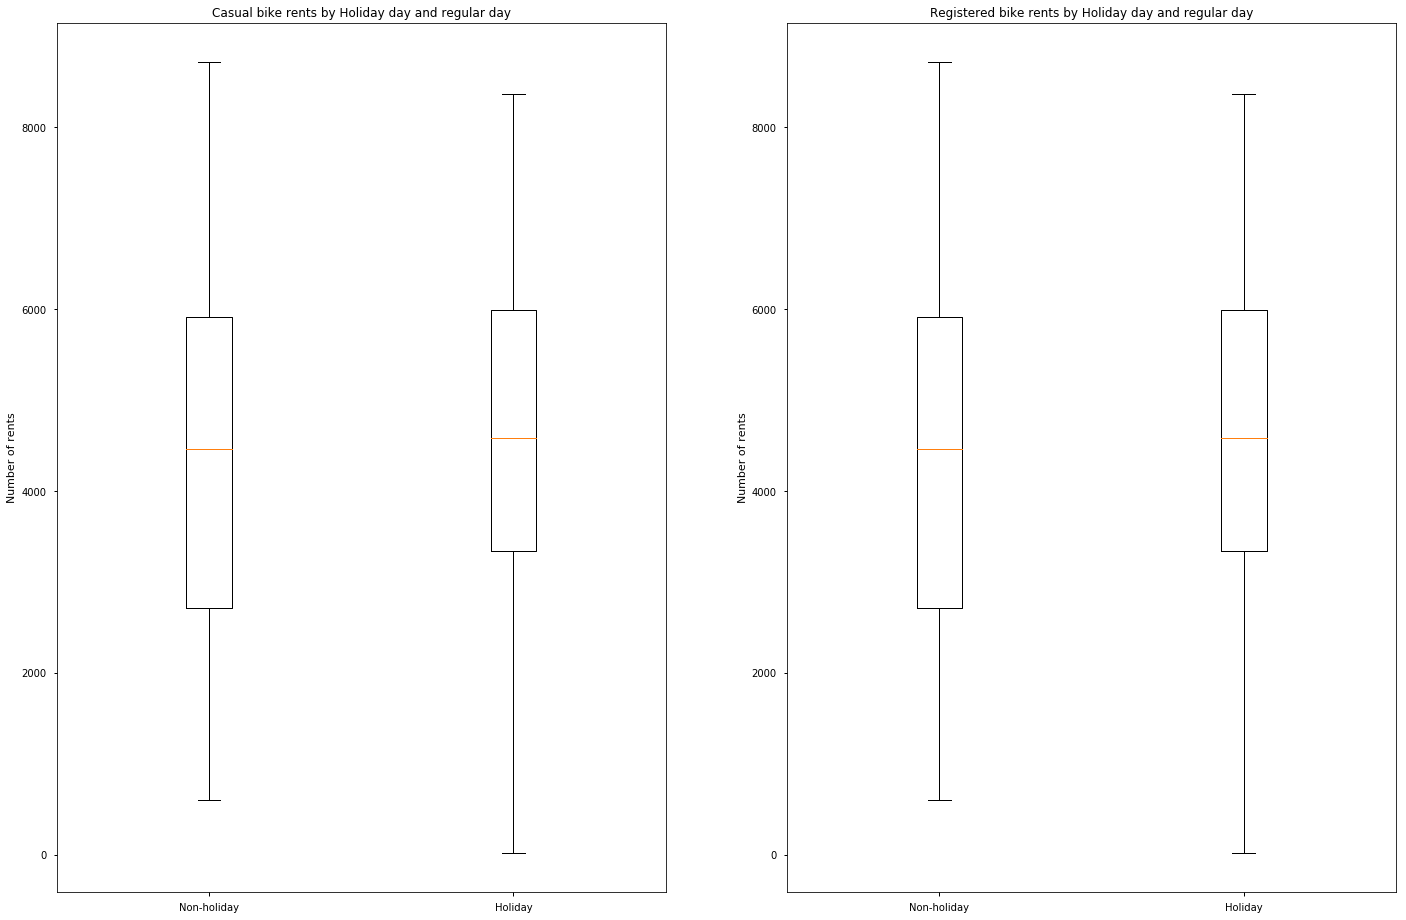

In [20]:
holiday_plot = plt.figure(figsize=(24,16))

#Boxplot of casual renters on holidays and non-holidays
ax31 = holiday_plot.add_subplot(121)

casual_by_holiday = [data_bike[data_bike['holiday']==0]['casual'].tolist(), data_bike[data_bike['holiday']==1]['casual'].tolist()]
ax31.boxplot(data_by_workingday, labels = ['Non-holiday','Holiday'])
ax31.set_title("Casual bike rents by Holiday day and regular day")
ax31.set_ylabel("Number of rents")

#Boxplot of registered renters on holidays and non-holidays
ax32 = holiday_plot.add_subplot(122)

registered_by_holiday = [data_bike[data_bike['holiday']==0]['registered'].tolist(), data_bike[data_bike['holiday']==1]['registered'].tolist()]
ax32.boxplot(data_by_workingday, labels = ['Non-holiday','Holiday'])
ax32.set_title("Registered bike rents by Holiday day and regular day")
ax32.set_ylabel("Number of rents")

plt.show()

Again, we can see that for casual users, they have higher demand during holiday as compared to non-holiday. On the opposite site, there are more registered users during non-holiday as compared to during holiday.

As stated, due to the small sample size of holiday, I will not perform any statistic test. But this finding hints that the fact that a day is a holiday might have different impacts on the number of casual and registered users. We might want to separate the users into casual and registered users if we want to incorporate variable 'holiday' into our predictive model. Moreover, to have a robust analysis on impact of holiday on users, it is also advisable to expand the data set for holiday to at least 30 observations.

<span style="color:blue">

### END OF DATA ANALYSIS QUESTION 2

</span>

### 3. How do the number of registered and casual users vary with respect to each other during holidays and work days? 
<span style= 'float: right;'><b>[15 marks]</b></span>

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

In question 2, I have already covered on how the number of registered and casual users vary with respect to each other during holidays. For question 3, I will only provide some additional visualization regarding to that relationship and focus more on the connection between the number of registered /casual users and work days 

First off, let's start with the scatterplot of casual/registered users separated by holiday indicator (blue for holiday, red for non-holiday)

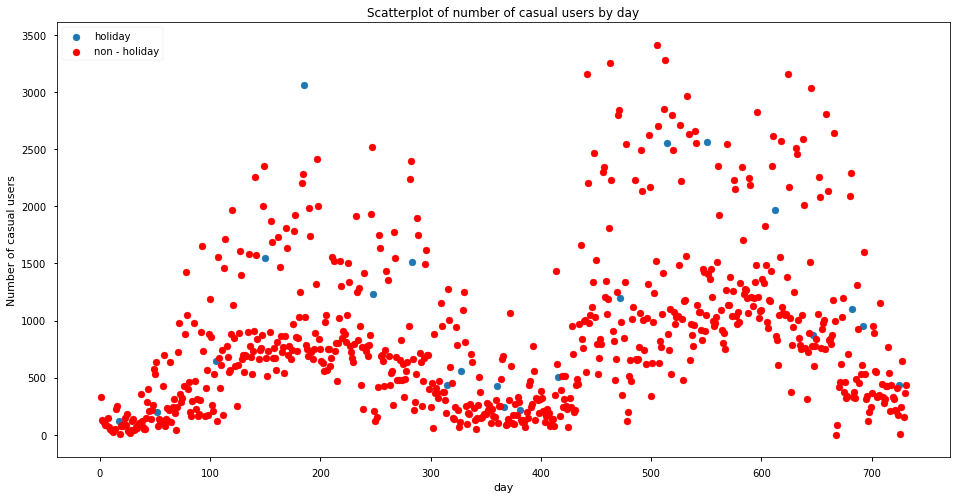

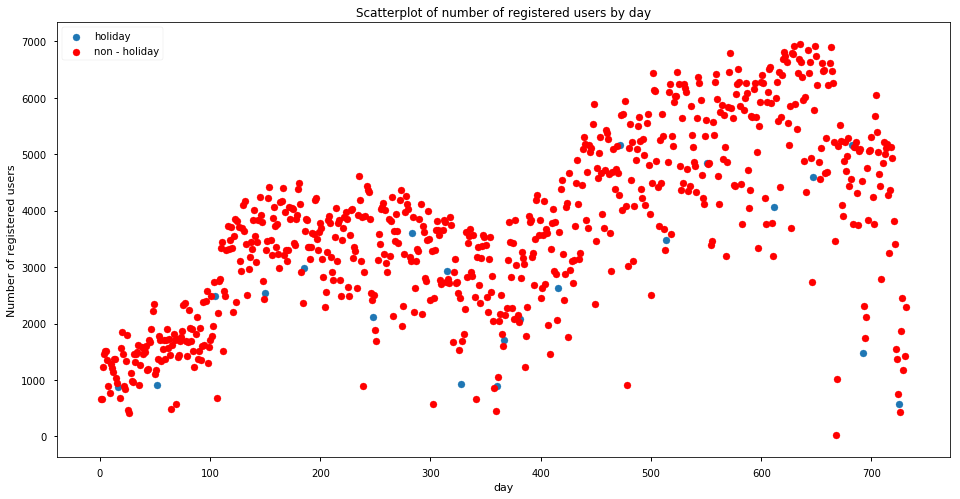

In [21]:
# scatterplot of casual/registered users separated by holiday indicator 
casual_holiday_plot = plt.figure(figsize=(16,8))

plt.scatter(data_bike[data_bike['holiday']== 1].index,data_bike[data_bike['holiday']== 1]['casual'], label='holiday')
plt.scatter(data_bike[data_bike['holiday']== 0].index,data_bike[data_bike['holiday']== 0]['casual'], label='non - holiday', color='red')
plt.title("Scatterplot of number of casual users by day")
plt.ylabel("Number of casual users")
plt.xlabel("day")
plt.legend(loc=2)

registered_holiday_plot = plt.figure(figsize=(16,8))

plt.scatter(data_bike[data_bike['holiday']== 1].index,data_bike[data_bike['holiday']== 1]['registered'], label='holiday')
plt.scatter(data_bike[data_bike['holiday']== 0].index,data_bike[data_bike['holiday']== 0]['registered'], label='non - holiday', color='red')
plt.title("Scatterplot of number of registered users by day")
plt.ylabel("Number of registered users")
plt.xlabel("day")
plt.legend(loc=2)

plt.show()



# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

From the two plots, the trends we observed in question 2 seem to be much less noticable. This scatterplot also justifies the point which I made earlier: The data set for holiday was not big enough, as such, we cannot conduct any meaningful statistical test to study how number of registered and casual users vary with respect to each other during holidays

Moving on to examining the relationship between the number of registered and casual users vary with respect to each other during work days, I expect the relationship to be somewhat similar to what I have presented in question 2 for the relationship between days of the week and casual/registered users.

In question 2, I discovered that while the average number of casual users throughout the week remains pretty consistent, the average number of casual users increase significantly on weekends (Saturday and Sunday). In contrast, while the average number of registered users throughout the week remains pretty consistent, the average number of registered users decrease significantly on weekends (Saturday and Sunday). Weekends can also be referred as non-working days while most of the weekdays are working day. 

Nevertheless, for completeness, I will perform similar data analysis with variable 'workday'

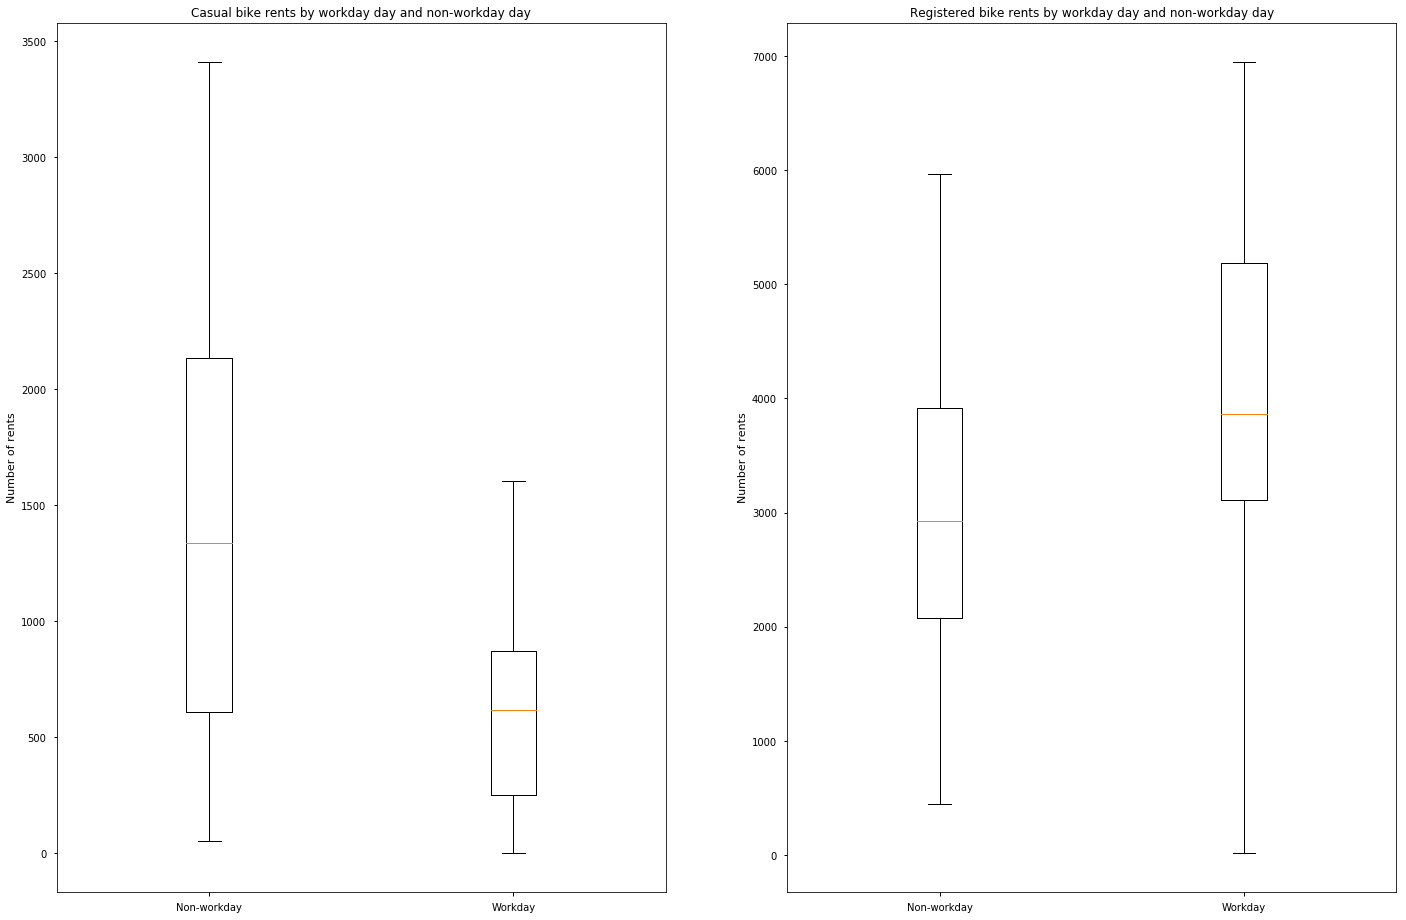

In [55]:
workday_plot = plt.figure(figsize=(24,16))

#Boxplots for casual and registered renters, separated by working and non-working days
ax41 = workday_plot.add_subplot(121)

data_by_workingday = [data_bike[data_bike['workingday']==0]['casual'].tolist(), data_bike[data_bike['workingday']==1]['casual'].tolist()]
ax41.boxplot(data_by_workingday, labels = ['Non-workday','Workday'])
ax41.set_title("Casual bike rents by workday day and non-workday day")
ax41.set_ylabel("Number of rents")

ax42 = workday_plot.add_subplot(122)

data_by_workingday = [data_bike[data_bike['workingday']==0]['registered'].tolist(), data_bike[data_bike['workingday']==1]['registered'].tolist()]
ax42.boxplot(data_by_workingday, labels = ['Non-workday','Workday'])
ax42.set_title("Registered bike rents by workday day and non-workday day")
ax42.set_ylabel("Number of rents")

plt.show()

So the 2 boxplots turn out as expected, there are more casual users on non-workdays as compared to work days while for registered users, there are more of them in work days as compared to non-workdays. Given that there are 231 non-work days, this dataset is large enough for me to conduct statistical tests.

In [23]:
#ttests for means of casual/registered users on working and non-working day
t_casual_working = spystats.ttest_ind(data_bike[data_bike['workingday'] == 0]['casual'], data_bike[data_bike['workingday'] == 1]['casual'])
t_registered_working = spystats.ttest_ind(data_bike[data_bike['workingday'] == 0]['registered'], data_bike[data_bike['workingday'] == 1]['registered'])

#ttests for means of total users on working and non-working day
t_both_working = spystats.ttest_ind(data_bike[data_bike['workingday'] == 0]['count'], data_bike[data_bike['workingday'] == 1]['count'])

print(t_casual_working)

print(t_registered_working)

print(t_both_working)


Ttest_indResult(statistic=16.352522523905225, pvalue=1.944267373388513e-51)
Ttest_indResult(statistic=-8.612866392426497, pvalue=4.38157108936899e-17)
Ttest_indResult(statistic=-1.6543102137118633, pvalue=0.09849496160024915)


The near-zero p-values of the two ttest confirms that we have enough evidence to reject the null hypothesis that number of casual/registered users are the same for working and non-working days. 

Thus, we can conclude that there are statistically significant differences between the number of casual/registered users on workings and non-working days. This implies that the fact that a day is a working or non-working day can influence the number of casual and registered users.

Nonetheless, if we do not separate the data into casual and registered users, the t test for means of total users between working and non-working day will return a p-value of 0.0985. With this p-value, we cannot reject the null hypothesis that the mean value for total users are the same for working and non-working day at 5% significance level. Thus, by not separating the data, we might overlook the relationship between casual/registered user and working days.

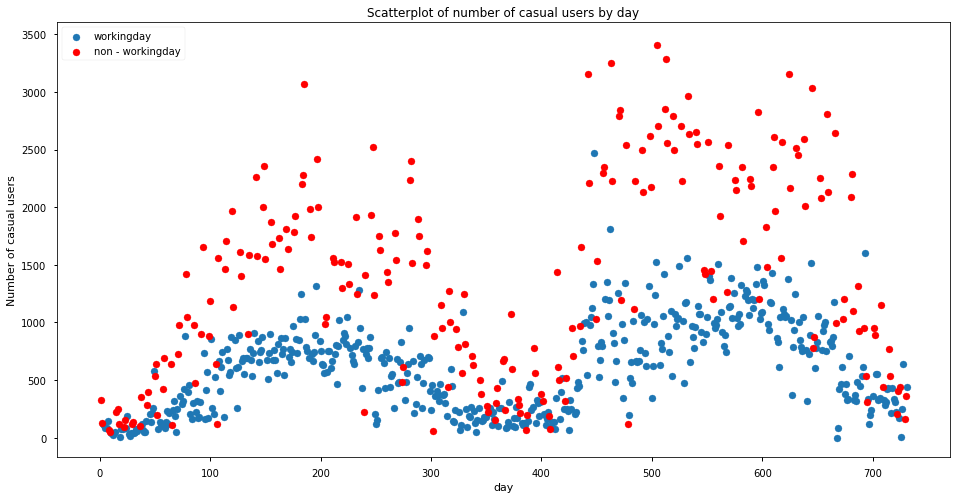

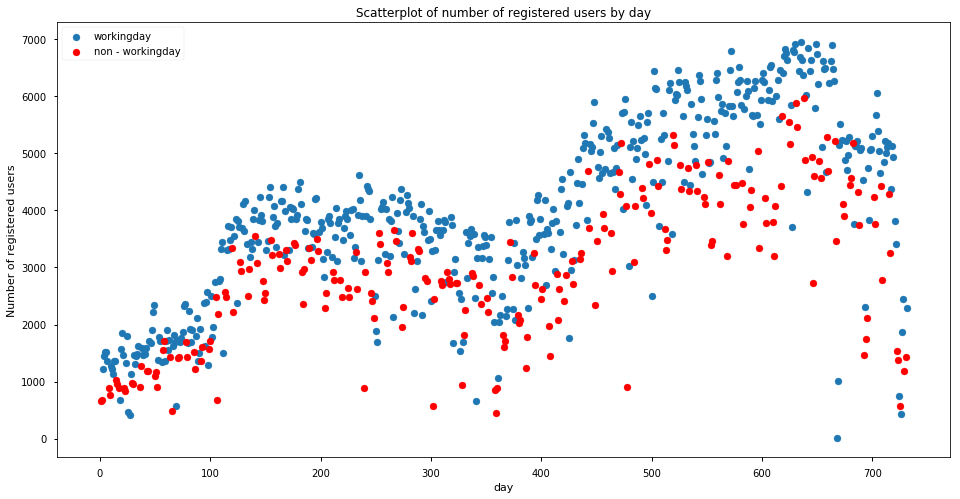

In [24]:
#Scatterplots for casual and registered renters, separated by working and non-working days

casual_working_plot = plt.figure(figsize=(16,8))

plt.scatter(data_bike[data_bike['workingday']== 1].index,data_bike[data_bike['workingday']== 1]['casual'], label='workingday')
plt.scatter(data_bike[data_bike['workingday']== 0].index,data_bike[data_bike['workingday']== 0]['casual'], label='non - workingday', color='red')
plt.title("Scatterplot of number of casual users by day")
plt.ylabel("Number of casual users")
plt.xlabel("day")
plt.legend(loc=2)

registered_working_plot = plt.figure(figsize=(16,8))

plt.scatter(data_bike[data_bike['workingday']== 1].index,data_bike[data_bike['workingday']== 1]['registered'], label='workingday')
plt.scatter(data_bike[data_bike['workingday']== 0].index,data_bike[data_bike['workingday']== 0]['registered'], label='non - workingday', color='red')
plt.title("Scatterplot of number of registered users by day")
plt.ylabel("Number of registered users")
plt.xlabel("day")
plt.legend(loc=2)

plt.show()

The scatterplots of casual and registered users, separated by working day, non-working day further highlight the relationship between the two variables.

In conclusion, if we want to create a model predicting total number of users and to include variables such as holiday and workday as explanatory variables, we should considering splitting our model into two: one predicts the number of casual users and one predicts the number of registered users. Such method would bring about more accuracy as casual users and registered users interact with holidays and work days differently.

<span style="color:blue">

### END OF DATA ANALYSIS QUESTION 3

</span>

### 4. What relationship can you find among the attributes relating to weather in this dataset?
<span style= 'float: right;'><b>[6 marks]</b></span>

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

In [56]:
# quick summary of data by grouping them into weather conditions 1,2,3
data_bike.groupby('weather')[['temp','atemp','humidity','windspeed']].agg(['mean','median','max','min'])



temp                                  atemp                      \
             mean    median       max      min      mean    median       max   
weather                                                                        
1        0.511541  0.521667  0.861667  0.05913  0.488596  0.511983  0.840896   
2        0.470366  0.458333  0.815000  0.10750  0.452868  0.450121  0.826371   
3        0.433440  0.440000  0.633913  0.21750  0.413064  0.439400  0.555361   

                   humidity                               windspeed            \
              min      mean    median       max       min      mean    median   
weather                                                                         
1        0.079070  0.565594  0.567917  0.835833  0.187917  0.190253  0.178496   
2        0.119337  0.725887  0.734167  0.972500  0.407083  0.186431  0.179725   
3        0.203600  0.848872  0.888333  0.970417  0.000000  0.243336  0.248150   

                             
              max       min  
weather                      
1        0.507463  0.022392  
2        0.414800  0.047275  
3        0.358200  0.097021

From the summary of statistics, the key takeaways from the attributes relating to weather are:

- For nice weather (weather condition = 1), the temperature is generally higher (signified by the higher mean and median). It also goes together with low humidity and average windspeed.
- For bad weather (weather condition = 3), the temperature is lower, with higher humidity and higher wind speed. This is logical and intuitive since these features usually go together with rain or snow

In [26]:
data_bike.groupby('season')[['temp','atemp','humidity','windspeed']].agg(['mean','median','max','min'])


temp                                   atemp                      \
            mean    median       max       min      mean    median       max   
season                                                                         
1       0.297748  0.285833  0.572500  0.059130  0.296914  0.282821  0.548617   
2       0.544405  0.562083  0.808333  0.253043  0.520307  0.538212  0.757579   
3       0.706309  0.714583  0.861667  0.469167  0.655898  0.656575  0.840896   
4       0.422906  0.409166  0.657500  0.220833  0.415539  0.409393  0.607975   

                  humidity                               windspeed            \
             min      mean    median       max       min      mean    median   
season                                                                         
1       0.079070  0.582903  0.544167  0.948261  0.000000  0.214537  0.202750   
2       0.250339  0.626948  0.644375  0.922500  0.254167  0.203507  0.194031   
3       0.242400  0.633482  0.635000  0.939565  0.360000  0.172095  0.165115   
4       0.227913  0.668719  0.661042  0.972500  0.333478  0.171995  0.166986   

                            
             max       min  
season                      
1       0.507463  0.045408  
2       0.388067  0.065929  
3       0.375617  0.064071  
4       0.422275  0.022392

Moreover, when we examine the weather condition by weather, we can also observe that:

- Spring and Winter have lower temperature as compared to Summer and Autumn
- Spring is the season with lowest humidity
- Generally, it is also more windy in Spring and Summer as compared to Autumn and Winter

In [57]:
#obtain the counts for various combinations of season and weather
data_bike.groupby(['season','weather']).size()


season  weather
1       1          111
        2           66
        3            4
2       1          113
        2           68
        3            3
3       1          136
        2           48
        3            4
4       1          103
        2           65
        3           10
dtype: int64

From exploring the relationship between season and weather conditions, we also find that most of the days, the weather is nice (weather condition = 1) or acceptable (weather = 2). There are only a few days with bad weather (=3). Moreover, autumn seems to be the nicest season with the most number of day with weather condition = 1.

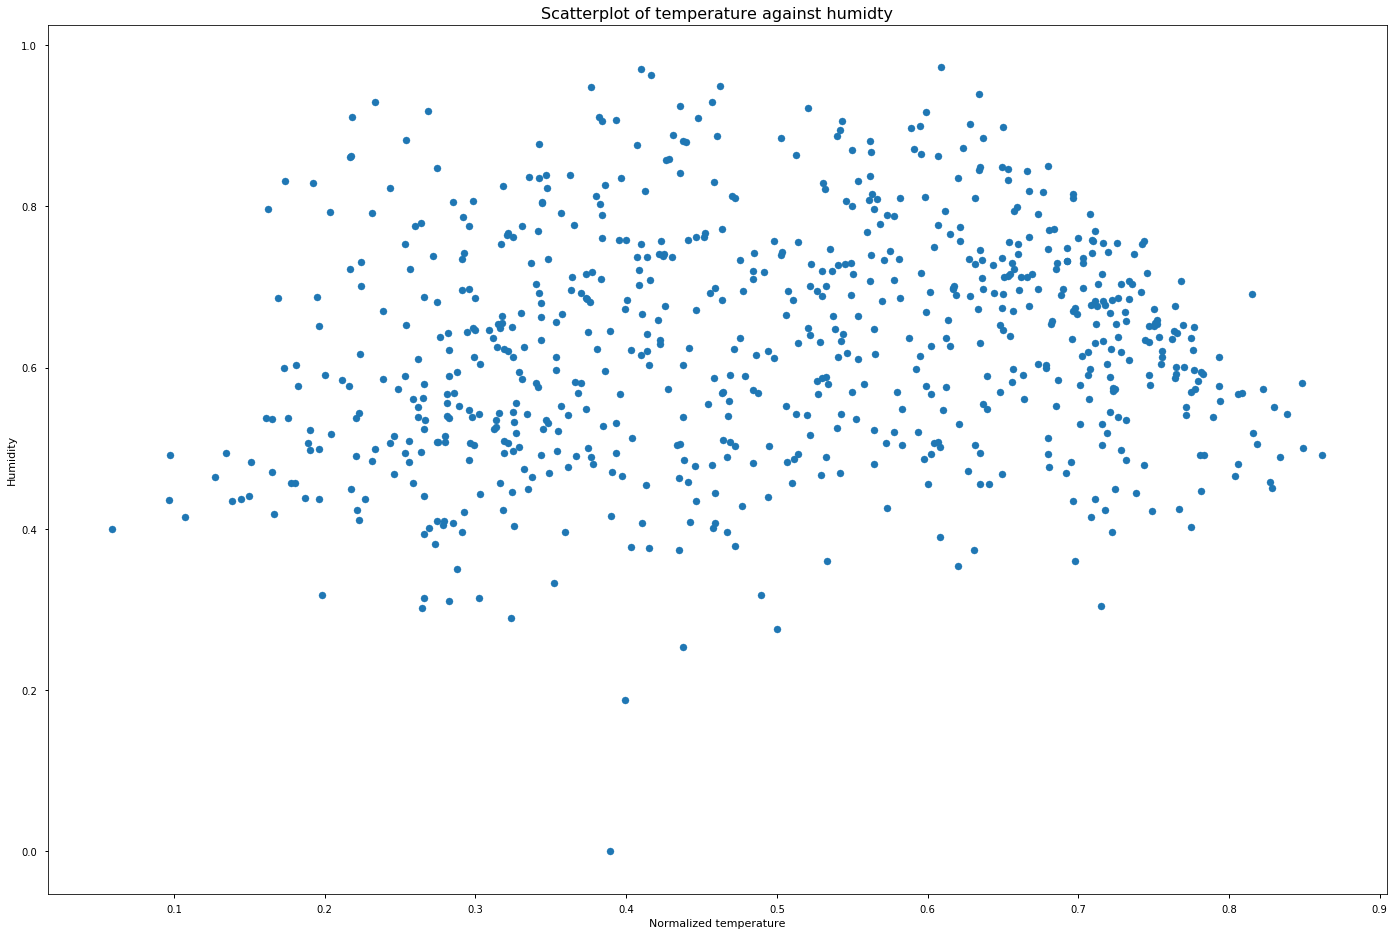

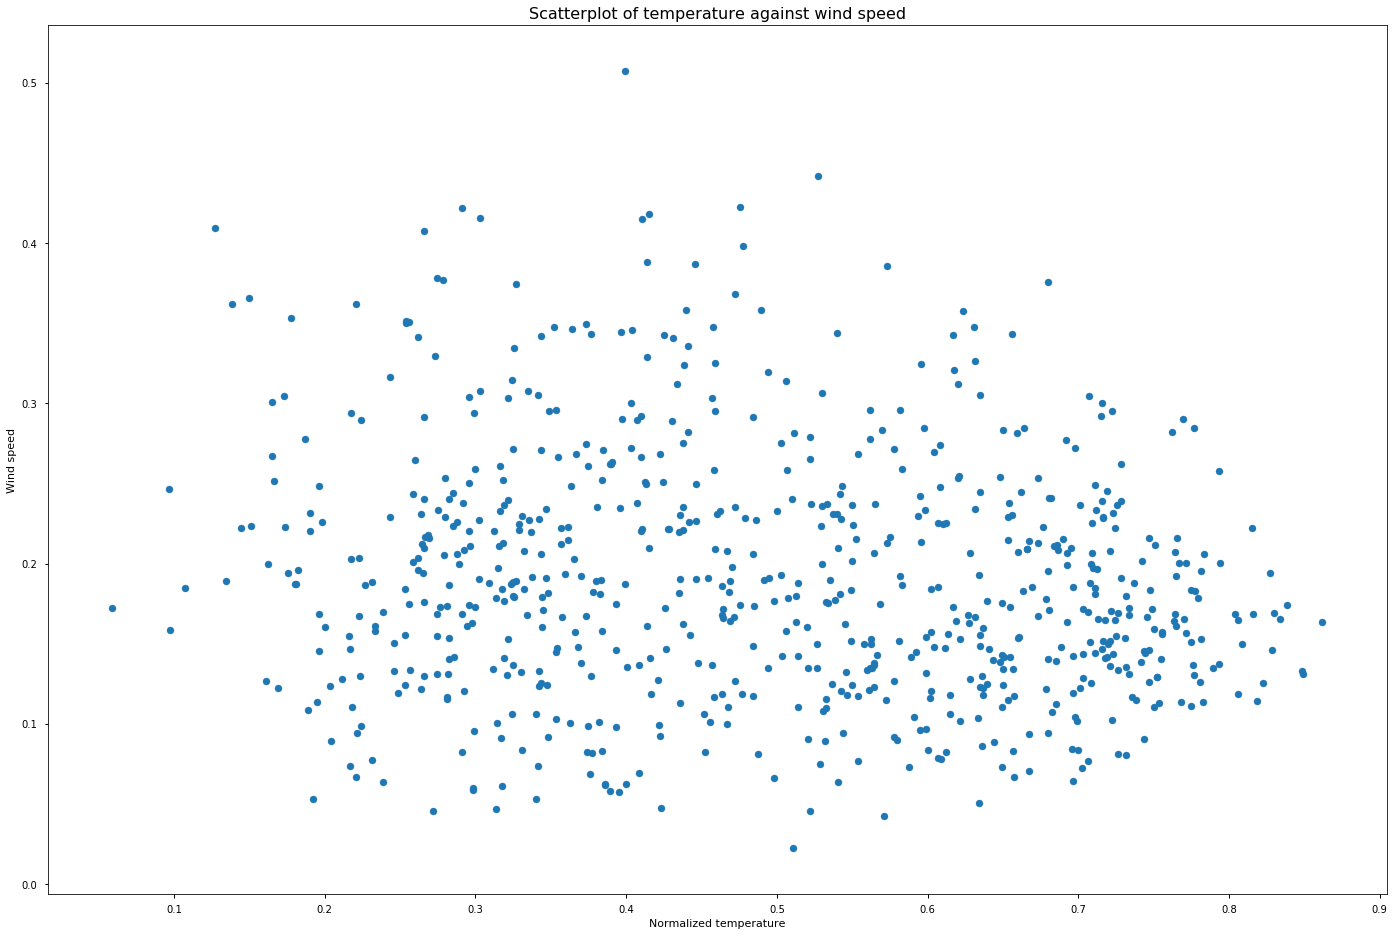

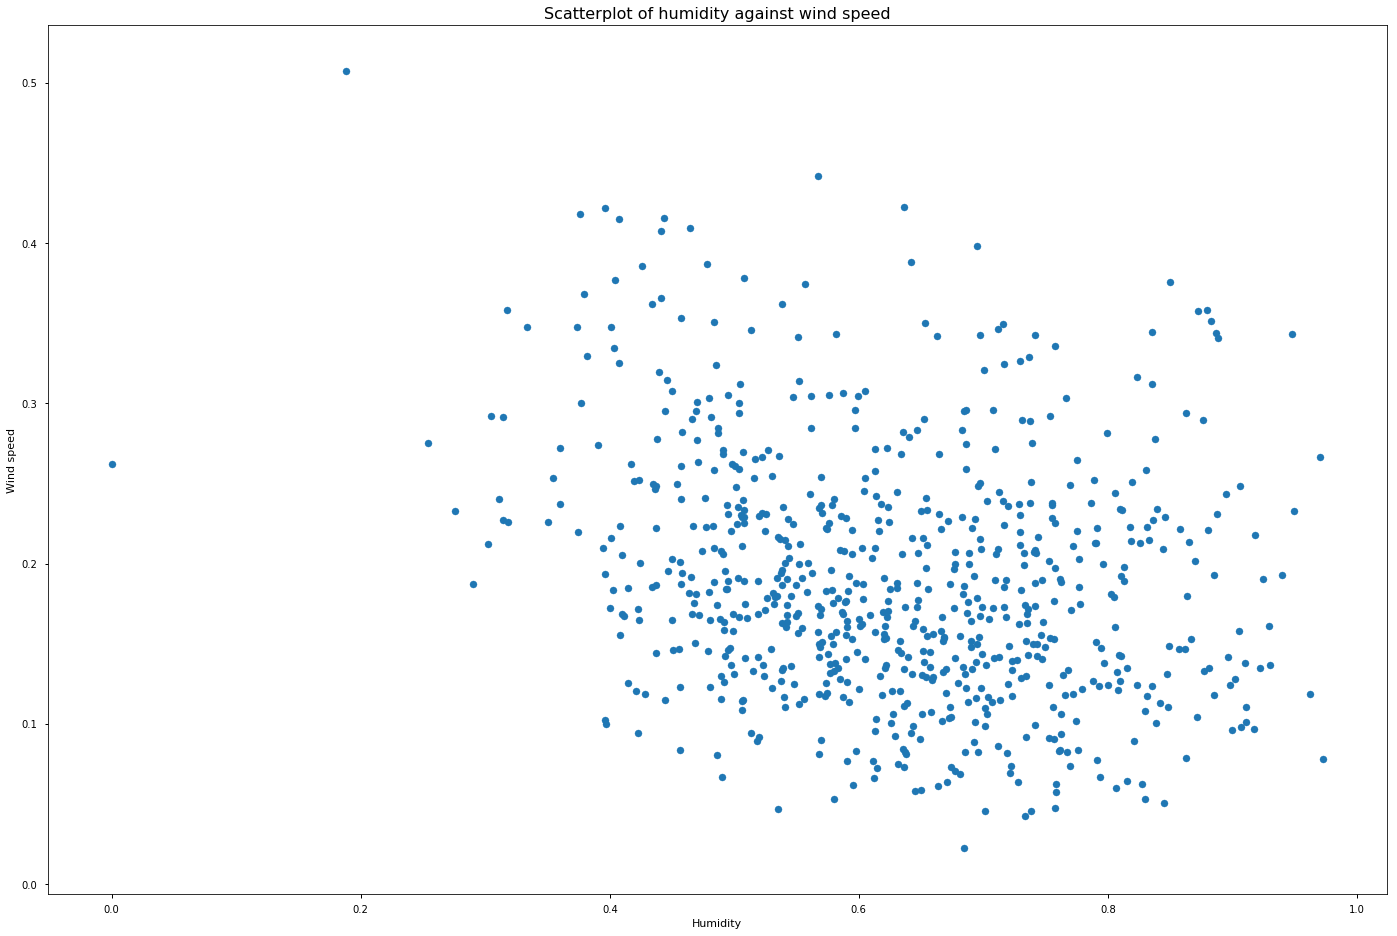

In [28]:
temp_hum_plot = plt.figure(figsize=(24,16))

#Scatter plot of temperature against humidity
plt.scatter(data_bike['temp'],data_bike['humidity'],s=50)
plt.title("Scatterplot of temperature against humidty", fontsize = 16)
plt.ylabel("Humidity")
plt.xlabel("Normalized temperature")

temp_wind_plot = plt.figure(figsize=(24,16))

#Scatter plot of temperature against windspeed
plt.scatter(data_bike['temp'],data_bike['windspeed'],s=50)
plt.title("Scatterplot of temperature against wind speed", fontsize = 16)
plt.ylabel("Wind speed")
plt.xlabel("Normalized temperature")


hum_wind_plot = plt.figure(figsize=(24,16))

#Scatter plot of humidity against windspeed
plt.scatter(data_bike['humidity'],data_bike['windspeed'],s=50)
plt.title("Scatterplot of humidity against wind speed", fontsize = 16)
plt.ylabel("Wind speed")
plt.xlabel("Humidity")


plt.show()


From the scatterplot of pairs of variables amongst temperature, humidity and wind speed. We do not detect any obvious relationship between any pair of variables. This is expected, given the result of our exploratory data analysis. Earlier in this report, we have computed the correlation between all the continuous variables and amongst these 3 variables, none of the correlation is significantly high.

<span style="color:blue">

### END OF DATA ANALYSIS QUESTION 4

</span>

### 5. From this dataset, find out something that this data doesn’t show you directly, but you find interesting about this dataset.
<span style= 'float: right;'><b>[14 marks]</b></span>

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

In [29]:
#select top 150 days with most number of bike renters
top_count = data_bike.sort_values(by='count', ascending = False)[:150]

#Obtain summaries of statistics for continuous variable for the new created data frame
top_count.iloc[:,8:].describe()



,temp,atemp,humidity,windspeed,casual,registered,count
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.624761,0.587786,0.598886,0.168118,1523.746667,5713.253333,7237.000000
std,0.101550,0.088293,0.107795,0.063062,733.370697,794.191448,515.698757
min,0.389167,0.242400,0.254167,0.057846,551.000000,3308.000000,6312.000000
25%,0.550000,0.531723,0.520833,0.124840,1002.750000,5181.250000,6835.500000
50%,0.632500,0.594706,0.611875,0.155785,1187.000000,5874.000000,7284.000000
75%,0.715208,0.654526,0.681563,0.210984,2162.750000,6279.500000,7571.500000
max,0.818333,0.755683,0.831250,0.347642,3410.000000,6946.000000,8714.000000


In [58]:
#Obtain summaries of statistics for continuous variable for the original dataset
data_bike.iloc[:,8:].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


I selected the 150 days with most number of bike rented from the data set to study which are the key drivers for high number of users. Comparing the continuous variables of the top 150 observations and the sample data we have, we can draw the following conclusion:

- Firstly, day with highest number of bike rented have high temperature (with mean = 0.62476 as compared to 0.4953 of sample mean.
- The humidity for the top 150 days and the sample is almost similar, as such, humidity might not be a key driver of high number of users
- Generally, the windspeed for days with high number of users are lower than sample average


In [31]:
#Count the number of observations for each factor variable in top 150 dataset
summary_tcount = top_count.agg({'season': 'value_counts','year': 'value_counts', 'month': 'value_counts','holiday': 'value_counts','weekday': 'value_counts','workingday': 'value_counts','weather': 'value_counts'})
summary_tcount.fillna('-')

,season,year,month,holiday,weekday,workingday,weather
0,-,-,-,148,18,44,-
1,2,150,-,2,17,106,121
2,48,-,-,-,20,-,29
3,67,-,4,-,23,-,-
4,33,-,13,-,26,-,-
5,-,-,17,-,22,-,-
6,-,-,22,-,24,-,-
7,-,-,20,-,-,-,-
8,-,-,25,-,-,-,-
9,-,-,24,-,-,-,-


In [32]:
#Find out which holidays make it to the top 150 days with most renters
top_count[top_count['holiday']==1]

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,,
551,2012-07-04,3,1,7,1,3,0,1,0.789167,0.732337,0.538750,0.134950,2562,4841,7403
472,2012-04-16,2,1,4,1,1,0,1,0.664167,0.614925,0.561667,0.284829,1198,5172,6370


Then, I examine the count for factor variables. The following conclusions can be drawn from the table:

- Spring is the least popular season while autumn is the most popular season, following by summer. Thus, we should expect higher number of users in Summer and Autumn. 
- All the observations come from year 2012, which means the number of rented bike keep increasing. Moreover, as all of our variables are expected to be somewhat consistent throughout the years (weather, number of holidays, working days, seasons, months, etc) there must be other variables that account for the change in number of rented bikes. Thus we need to indentify those key drivers if we want to enhance the accuracy in predicting the number of users in the years to come.
- November to April seem to be the least popular period of time while May to October have more days with top 150 numbers of users. Thus, time of the year seems to correlate with number of users, which is intuitive as time of the years also relate to various weather variables.
- Only 2 holiday makes to the top 150 lists. The 2 dates are 4th July, Independence day and 16th April, Emancipation Day in DC. These two date can be considered as abnomalies for holiday data set.
- For days of week, the top 150 seems to be evenly spread out throughout the weeks.
- There are 44 non-working days and 106 workings make it to top 150 lists. It hints that our users might use by to commute for purposes other than work.
- Clear skies (weather = 1) is important for high demand of users

In [59]:
#create a new dataframe of 150 days with lowest number of users and quickly describe the summary statistics for continous variables
bottom_count = data_bike.sort_values(by='count')[:150]
bottom_count.iloc[:,8:].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.291891,0.288797,0.632669,0.222993,233.633333,1483.260000,1716.893333
std,0.109985,0.101919,0.185071,0.085738,214.870288,505.963543,574.233848
min,0.059130,0.079070,0.000000,0.045408,2.000000,20.000000,22.000000
25%,0.216875,0.226960,0.494130,0.162635,89.750000,1182.500000,1343.000000
50%,0.274475,0.268311,0.613125,0.219836,167.500000,1516.500000,1768.000000
75%,0.346305,0.350947,0.790770,0.273336,287.000000,1814.250000,2175.000000
max,0.680000,0.635556,0.972500,0.507463,1047.000000,2553.000000,2689.000000


The same process is carried for the 150 days with lowest number of total users. This set of data strengthens our prior conclusion as:

- The mean temperature for the 150 days with least users is much lower than the sample average
- Again, humidity is about the same for sample average, which means this variable my not be a big factor in explaning the trend in total users
- Generally, the wind speed is stronger than the sample average

In [60]:
#Count the number of observations for each factor variable in bottom 150 dataset

summary_bcount = bottom_count.agg({'season': 'value_counts','year': 'value_counts', 'month': 'value_counts','holiday': 'value_counts','weekday': 'value_counts','workingday': 'value_counts','weather': 'value_counts'})
summary_bcount.fillna('-')

,season,year,month,holiday,weekday,workingday,weather
0,-,120,-,142,24,58,-
1,108,30,43,8,20,92,70
2,21,-,31,-,20,-,63
3,3,-,27,-,27,-,17
4,18,-,10,-,18,-,-
5,-,-,1,-,15,-,-
6,-,-,-,-,26,-,-
8,-,-,1,-,-,-,-
9,-,-,3,-,-,-,-
10,-,-,7,-,-,-,-


This table also provides additional evidence supports our earlier finding:

- Spring is indeed the least favorite season for biking as around 70% of the lowest demand day come from Spring. It's also rare to observe low demand during autumn.
- December to March is truly the period where biking is not popular. Most of the days with lowest number of users come from these months.
- Not all holiday accounts for low usage as only 8 out 150 days with lowest demands are holiday. It seems that people still use the bike renting services during holiday.
- Day with lowest usage spread throughout the weeks.
- 58 our of 150 days with lowest usage are non-working day, this ratio is somewhat similar to 44/106 we have about. As such, it seems that the fact that a day is a working day or not does not significantly affect the number of user. This implies that renters do not solely use bike renting to commute to work.
- There are many days with nice weather (weather = 1) or decent weather (weather = 2) but the demand is still low. But it is notable that 17 out of 150 days with lowest number of rents are days with bad weather (weather = 3). Given that there are only 21 days with weather condition = 3, it's clear cut that bad weather drives down the demand significantly.

Given all these analyses, I believe that it is sensible to separate our data by months. More specifically, we will divide data into 2 parts: from November to April and from May to October. 

Dividing the data by months make sense since that 2 time frame account for different season and hence weather conditions. Moreover, it is also notable that most of the holidays in US fall within November to April (which can be confirmed by running this code data_bike[data_bike['holiday']==1]). Thus I would like to test if the demand for bike rents indeed significantly differ between these two time frame, my hypothesis would be:

Null hypothesis: Demand for bike rent is similar between 'November to April' and 'May to October'

Alternate hypothesis: Demand for bike rent is different between 'November to April' and 'May to October'

In [35]:
#slice the data into 2 stated time frame
nov_to_apr = data_bike[(data_bike['month']>10) | (data_bike['month']<5)]
may_to_oct = data_bike[(data_bike['month']>4) & (data_bike['month']<11)]

#perform the ttest
t_test_hyp = spystats.ttest_ind(nov_to_apr['count'],may_to_oct['count'])
t_test_hyp



Ttest_indResult(statistic=-17.505136350527, pvalue=1.53505452271279e-57)

Givent the pvalue is close to zero, I have sufficient evidence to reject null hypothesis and I can conclude that demand for bike rent is different between 'November to April' and 'May to October'. 

This conclusion imply that we might need different models for different time frame of the years since users might have different usage pattern for different time period.

Lastly, for completeness, I'd like to plot average users by month for casual and registered users separately to see if there is any distinction between the two group of users throughout the year.

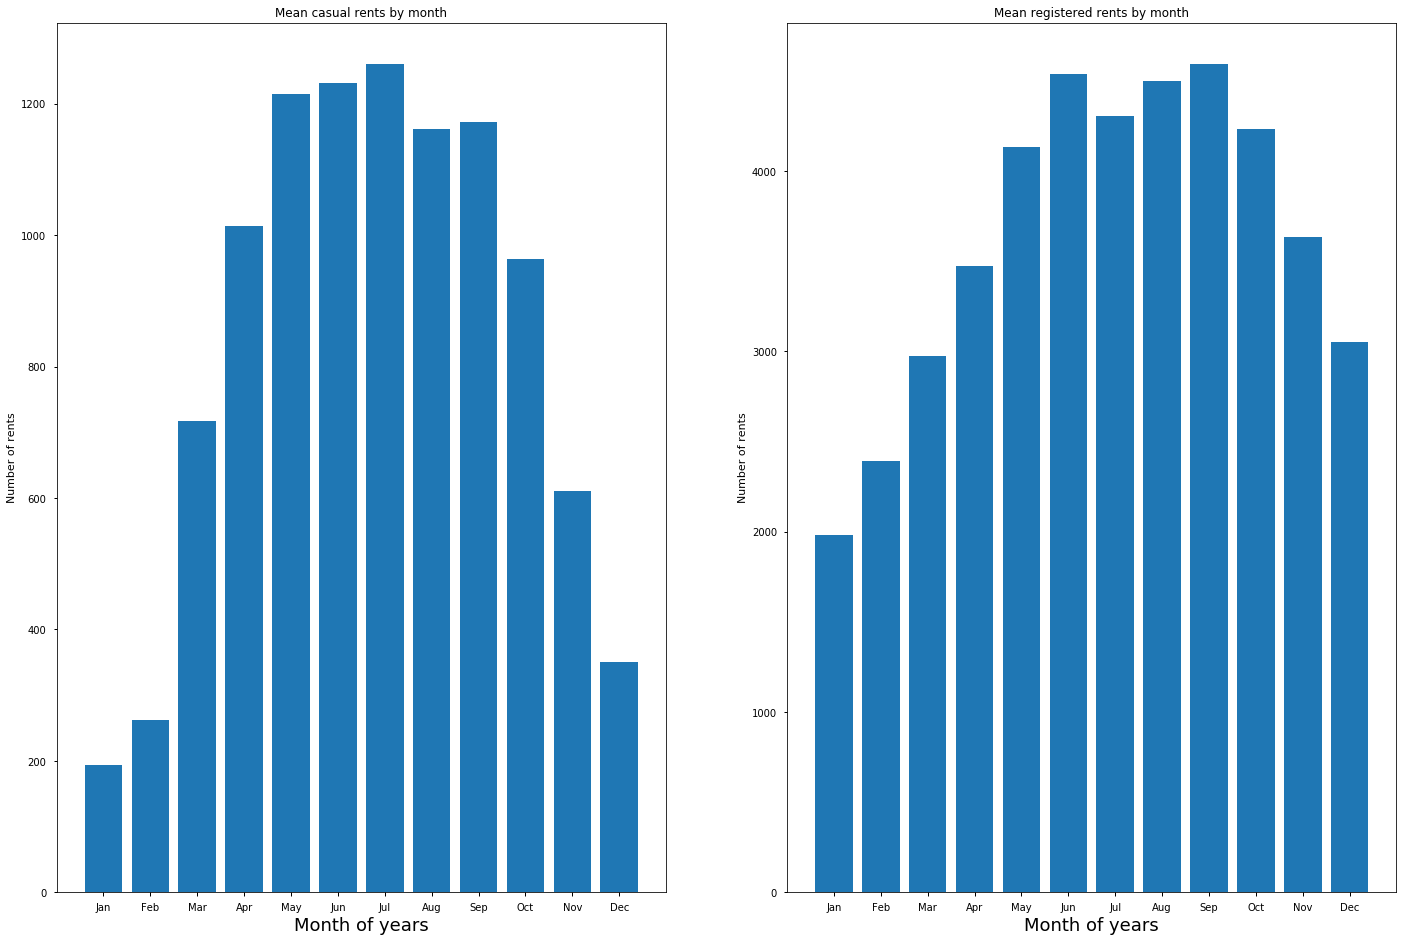

In [36]:
month_plot = plt.figure(figsize=(24,16))

ax51 = month_plot.add_subplot(121)
casual_by_month = data_bike.groupby('month')['casual'].mean()
ax51.bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],casual_by_month)
ax51.set_title("Mean casual rents by month")
ax51.set_xlabel("Month of years", fontsize = 18)
ax51.set_ylabel("Number of rents")

ax51 = month_plot.add_subplot(122)
registered_by_month = data_bike.groupby('month')['registered'].mean()
ax51.bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],registered_by_month)
ax51.set_title("Mean registered rents by month")
ax51.set_xlabel("Month of years", fontsize = 18)
ax51.set_ylabel("Number of rents")

plt.show()

Other than the fact that the 3-month period, December, January and February have noticeably low number of users, the trend for other months are somewhat similar. Thus, besides dividing the data by customers type, dividing the data by time period can also provide us with a lot of insights. 

<span style="color:blue">

### END OF DATA ANALYSIS QUESTION 5

</span>

## LINEAR REGRESSION

Now comes the fun part! In this section you have to implement a **Linear Regression Model**. Companies like **Mobike** and **AirBike** would like to make some predictions on their sales for the next few years. A linear Regression Model will help them predict the growth of their company in the coming years.

Your job is to implement a Linear Regression Model that predicts the number of bikes rented daily, based on the environmental and seasonal variables. There are multiple ways of doing this in Python. You are free to use any Python modules you like for this implementation. 
<span style= 'float: right;'><b>[25 marks]</b></span>

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

In [61]:
# Linear regression object
lm = LinearRegression()

# Features
x = data_bike[['season','weather','atemp','humidity','windspeed']]
y = data_bike['count']

#Regression
lm.fit(x, y)
print("Coefficients:", lm.coef_)
print("Intercept:", lm.intercept_)
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

seasons = np.array(data_bike['season']).reshape(-1,1)
atemps = np.array(data_bike['atemp']).reshape(-1,1)
humidities = np.array(data_bike['humidity']).reshape(-1,1)
weathers = np.array(data_bike['weather']).reshape(-1,1)
windspeeds = np.array(data_bike['windspeed']).reshape(-1,1)

estimate = lm.coef_[0] * seasons + lm.coef_[1] * weathers + lm.coef_[2] * atemps + lm.coef_[3] * humidities + lm.coef_[4] * windspeeds + lm.intercept_
print("R-squared:", skl.metrics.r2_score(y, estimate))
print("Mean Squared Error (MSE):", skl.metrics.mean_squared_error(y, estimate))

Coefficients: [  406.04267143  -443.78282753  6406.09938458 -2455.18043743
 -3054.04070838]
Intercept: 3194.44973586953
R-squared: 0.5185747810084691
Mean Squared Error (MSE): 1804215.3571149674


For my first linear regression, I include all the seasonal and environmental variables we have (exclude temp, since including both temp and atemp will be redundant) in the data set, namely: season, weather, atemp, humidity and windspeed. A summary of coefficient value with R-Squared and MSE is also presented.

From the output, we can draw the following conclusion:

- The season variable has a coefficient of 406.043. It is logical for the first 3 values, since from our prior analyses, Spring has the least number of renters and the total number of bike rents increase continually from Spring to Summer to Autumn. Nonetheless, if this is the case, holding everything else constant, winter (season = 4) should have highest number of users. This is counter-intuitive and we might want to split our data by season to obtain a more accurate model, or exclude variable season
- Other coefficient looks alright, as weather variable has a negative coefficient (since weather = 1 is the best outcome), atemp has a high positive coefficient (which was also observed earlier that high temperature generally result in higher number of users), and negative coefficient for humidity and windspeed (which is the conditions for good weather)

The R-squared is 0.5185, which is good for a model using real-life data.

Now, let's examine the plot of the actual and predicted data using our newly created model:


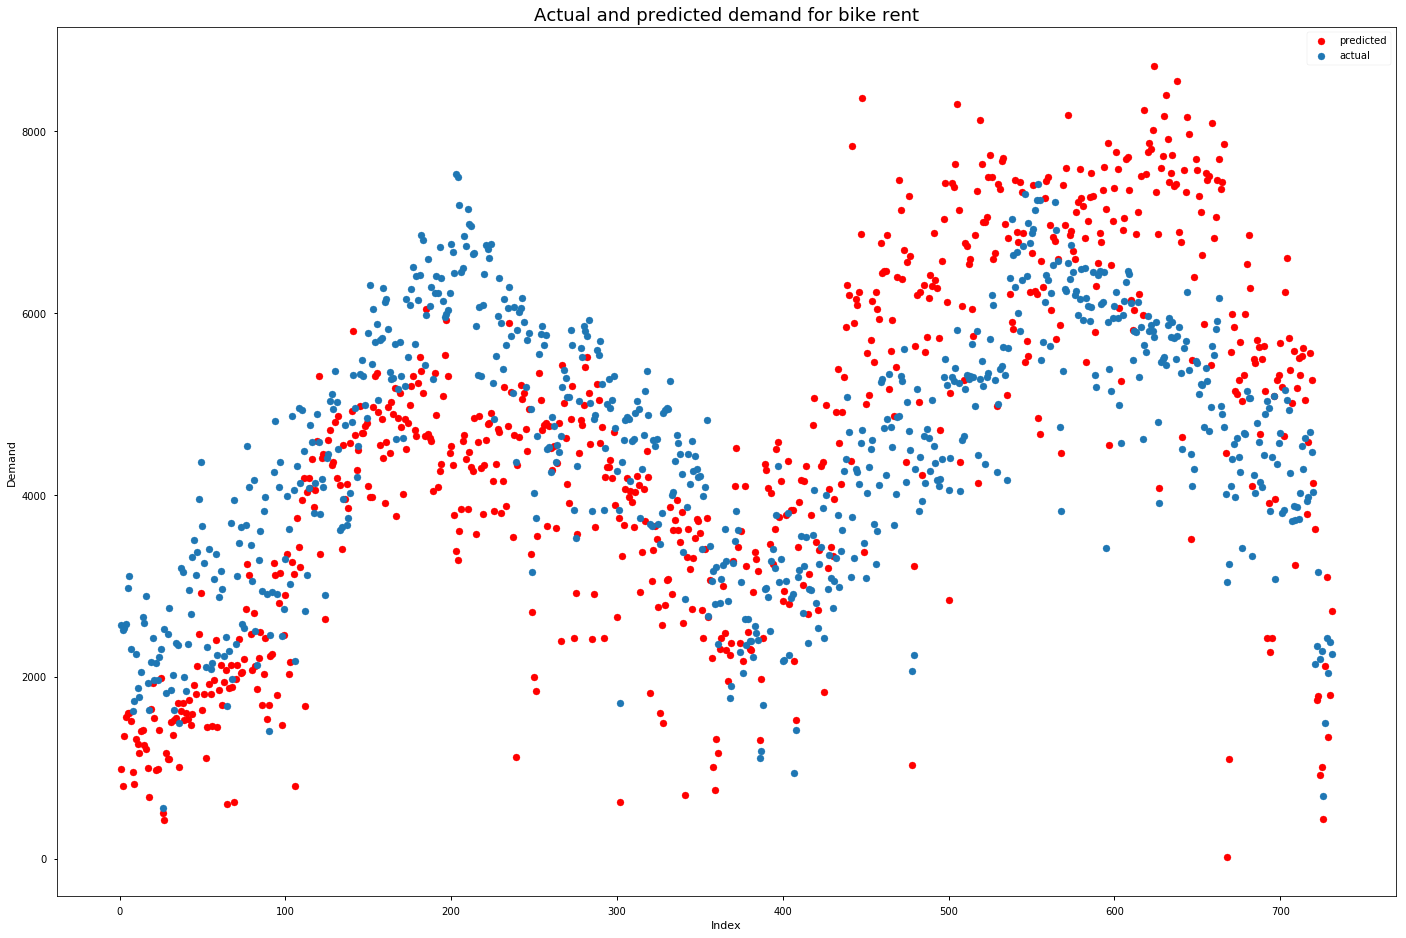

In [62]:
regress_plot0 = plt.figure(figsize=(24,16))

plt.scatter(np.arange(1,732,1),y, color='red', label = "predicted")
plt.scatter(np.arange(1,732,1),estimate, label = "actual")
plt.title("Actual and predicted demand for bike rent", fontsize = 18)
plt.ylabel("Demand")
plt.xlabel("Index")
plt.legend()
plt.show()

As we can see, the model predicts pretty well for day [1:100], [350,350] and around [650:730]. We can tell that fact since within these period, the actual values (red color) seem to be close to the predicted values (blue color). These are periods with low usages, thus, it seems that this model predicts better for low-demand than high demand day. To test that if this is the case, I use the model to predict the sales during high demand period (May to Oct) and low demand period (Nov to Apr), the result is presented below.

In [124]:
nov_to_apr_test_x = nov_to_apr[['season','weather','atemp','humidity','windspeed']]
nov_to_apr_test_y = nov_to_apr['count']

may_to_oct_test_x = may_to_oct[['season','weather','atemp','humidity','windspeed']]
may_to_oct_test_y = may_to_oct['count']

estimate_nov_to_apr = lm.predict(nov_to_apr_test_x)
estimate_may_to_oct = lm.predict(may_to_oct_test_x)

print("R-squared:", skl.metrics.r2_score(nov_to_apr_test_y, estimate_nov_to_apr))
print("Mean Squared Error (MSE):", skl.metrics.mean_squared_error(nov_to_apr_test_y, estimate_nov_to_apr))
print("R-squared:", skl.metrics.r2_score(may_to_oct_test_y, estimate_may_to_oct))
print("Mean Squared Error (MSE):", skl.metrics.mean_squared_error(may_to_oct_test_y, estimate_may_to_oct))


R-squared: 0.5084914004602133
Mean Squared Error (MSE): 1419950.6144221048
R-squared: 0.08709507179783382
Mean Squared Error (MSE): 2183259.111456025


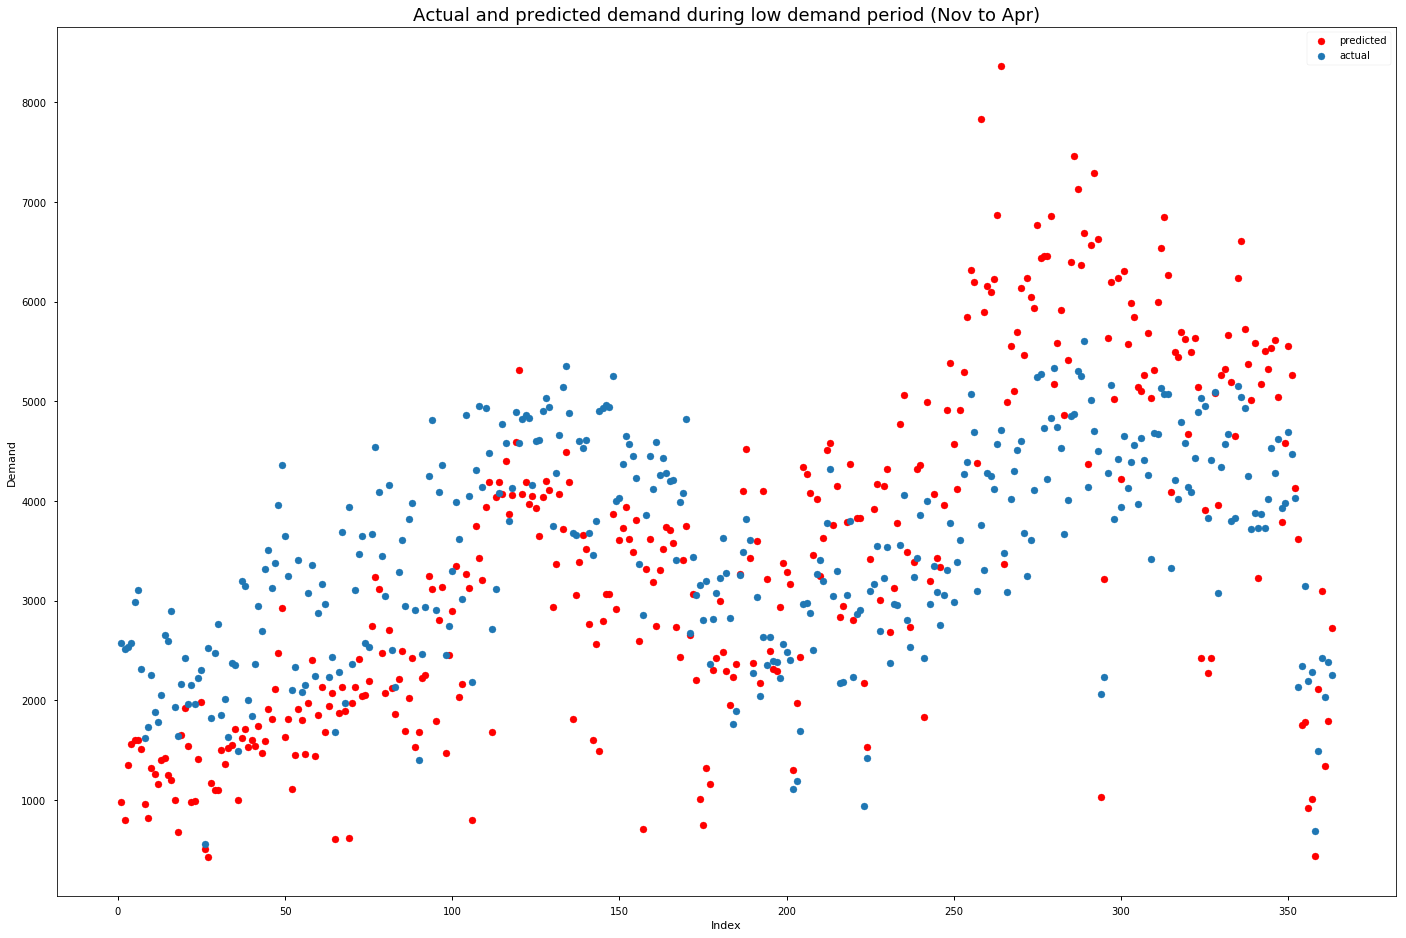

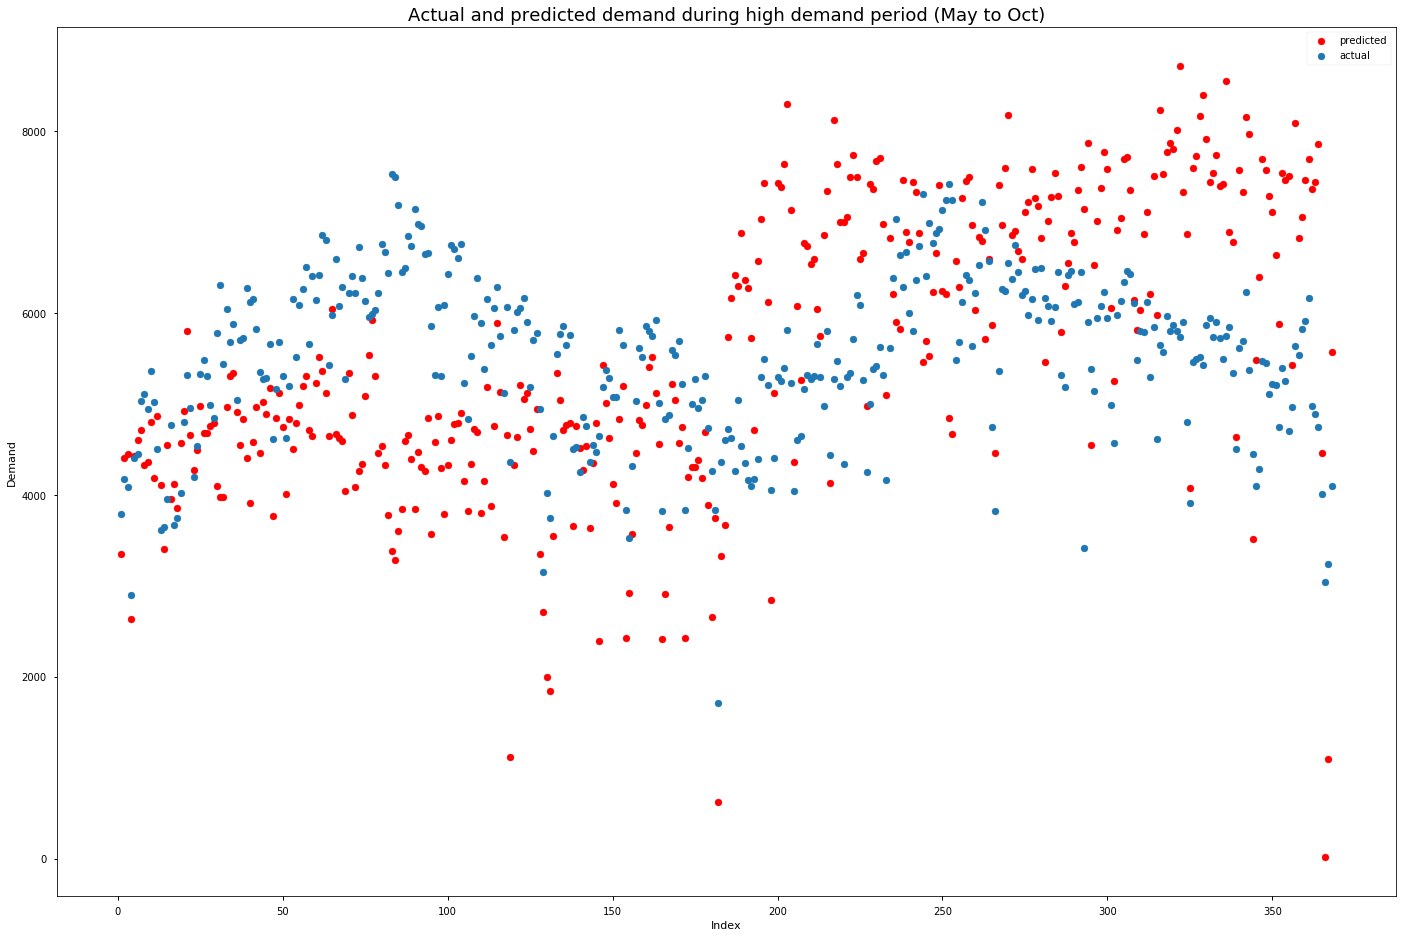

In [144]:
regress_plot1 = plt.figure(figsize=(24,16))
plt.scatter(np.arange(1,364,1),nov_to_apr_test_y, color='red', label ="predicted")
plt.scatter(np.arange(1,364,1),estimate_nov_to_apr, label ="actual")
plt.title("Actual and predicted demand during low demand period (Nov to Apr)", fontsize = 18)
plt.ylabel("Demand")
plt.xlabel("Index")
plt.legend()

regress_plot2 = plt.figure(figsize=(24,16))

plt.scatter(np.arange(1,369,1),may_to_oct_test_y, color='red',label ="predicted")
plt.scatter(np.arange(1,369,1),estimate_may_to_oct,label ="actual")
plt.title("Actual and predicted demand during high demand period (May to Oct)", fontsize = 18)
plt.ylabel("Demand")
plt.xlabel("Index")

plt.legend()
plt.show()

Thus, we can see that when we use the model to predict the high-demand period, the R score is very low = 0.087. On the other hand, when we use the model to predict the low-demand period, the R score is decent = 0.508. There is a possible explanation for this observation:

- From our 1 plot of all the data point, we can see that the errors of our model come from under-predicting for the 1st half (left-side) and over-predicting for the second half of the plot (right-side). This phenomenon is due to the fact that the demands are very different for 2011 and 2012 (which I pointed our in exploratory data analysis). 2011 has much lower sales while 2012 has much higher sales. Thus, if we use average measure of the 2 years to predict the sales in 2011 and 2012, it's intuitive that we will overpredict sales for 2011 and underpredict sale for 2012.

- Most of the variation comes from the period between May and October. This is because between 2 period May-Oct 2011 and May-Oct 2012, the number of bike rented increased significantly. Moreover, the variable(s) that is(are) responsible for such changes are not included in our data set. I believe that such variable has economic nature rather than seasonal or environmental.

Next up, I try to do 2 separate regressions for low and high demand period to see if we can alleviate the problem.

In [63]:
# Regression using only data from Month of November, December, January, February, March and April
# Linear regression object
lm3 = LinearRegression()

# Features
x1 = nov_to_apr[['season','weather','atemp','humidity','windspeed']]
y1 = nov_to_apr['count']

#Regression
lm3.fit(x1, y1)
print("Coefficients:", lm3.coef_)
print("Intercept:", lm3.intercept_)

seasons1 = np.array(nov_to_apr['season']).reshape(-1,1)
atemps1 = np.array(nov_to_apr['atemp']).reshape(-1,1)
humidities1 = np.array(nov_to_apr['humidity']).reshape(-1,1)
weathers1 = np.array(nov_to_apr['weather']).reshape(-1,1)
windspeeds1 = np.array(nov_to_apr['windspeed']).reshape(-1,1)

estimate1 = lm3.coef_[0] * seasons1 + lm3.coef_[1] * weathers1 + lm3.coef_[2] * atemps1 + lm3.coef_[3] * humidities1 + lm3.coef_[4] * windspeeds1 + lm3.intercept_

print("R-squared:", skl.metrics.r2_score(y1, estimate1))
print("Mean Squared Error (MSE):", skl.metrics.mean_squared_error(y1, estimate1))

Coefficients: [  356.2794334   -387.55278555  9707.4826023  -2624.16645857
 -3238.7963884 ]
Intercept: 2166.7682375830436
R-squared: 0.5476388818663503
Mean Squared Error (MSE): 1306854.9527637528


In [151]:
# Regression using only data from Month of May, June, July, August, September and October

# Linear regression object
lm5 = LinearRegression()

# Features
x2 = may_to_oct[['season','weather','atemp','humidity','windspeed']]
y2 = may_to_oct['count']

#Regression
lm5.fit(x2, y2)
print("Coefficients:", lm5.coef_)
print("Intercept:", lm5.intercept_)

seasons2 = np.array(may_to_oct['season']).reshape(-1,1)
atemps2 = np.array(may_to_oct['atemp']).reshape(-1,1)
humidities2 = np.array(may_to_oct['humidity']).reshape(-1,1)
weathers2 = np.array(may_to_oct['weather']).reshape(-1,1)
windspeeds2 = np.array(may_to_oct['windspeed']).reshape(-1,1)

estimate2 = lm5.coef_[0] * seasons2 + lm5.coef_[1] * weathers2 + lm5.coef_[2] * atemps2 + lm5.coef_[3] * humidities2 + lm5.coef_[4] * windspeeds2 + lm5.intercept_

print("R-squared:", skl.metrics.r2_score(y2, estimate2))
print("Mean Squared Error (MSE):", skl.metrics.mean_squared_error(y2, estimate2))

Coefficients: [   33.19179978  -459.53178438  -120.72343383 -4203.36071012
 -4281.41681003]
Intercept: 9640.473164148456
R-squared: 0.23249959603390702
Mean Squared Error (MSE): 1835516.709615213


For these 2 models, the R-squared score improves significantly, especially for the high demand timeframe. Nonetheless, I believe that R-squared of 0.232 might not be sufficient and we can still improve the model. The fact that between 2 period May-Oct 2011 and May-Oct 2012, the number of bike rented increased significantly, affects the accuracy of the model for May-Oct demands. I believe that if we only use the data for 2012, the R-squared can improve even further

Coefficients: [  131.28110958  -873.68312198  -696.65641655 -2724.39187705
 -4360.37831213]
Intercept: 10409.637434686098
R-squared: 0.37706867830210467
Mean Squared Error (MSE): 890964.3207895504


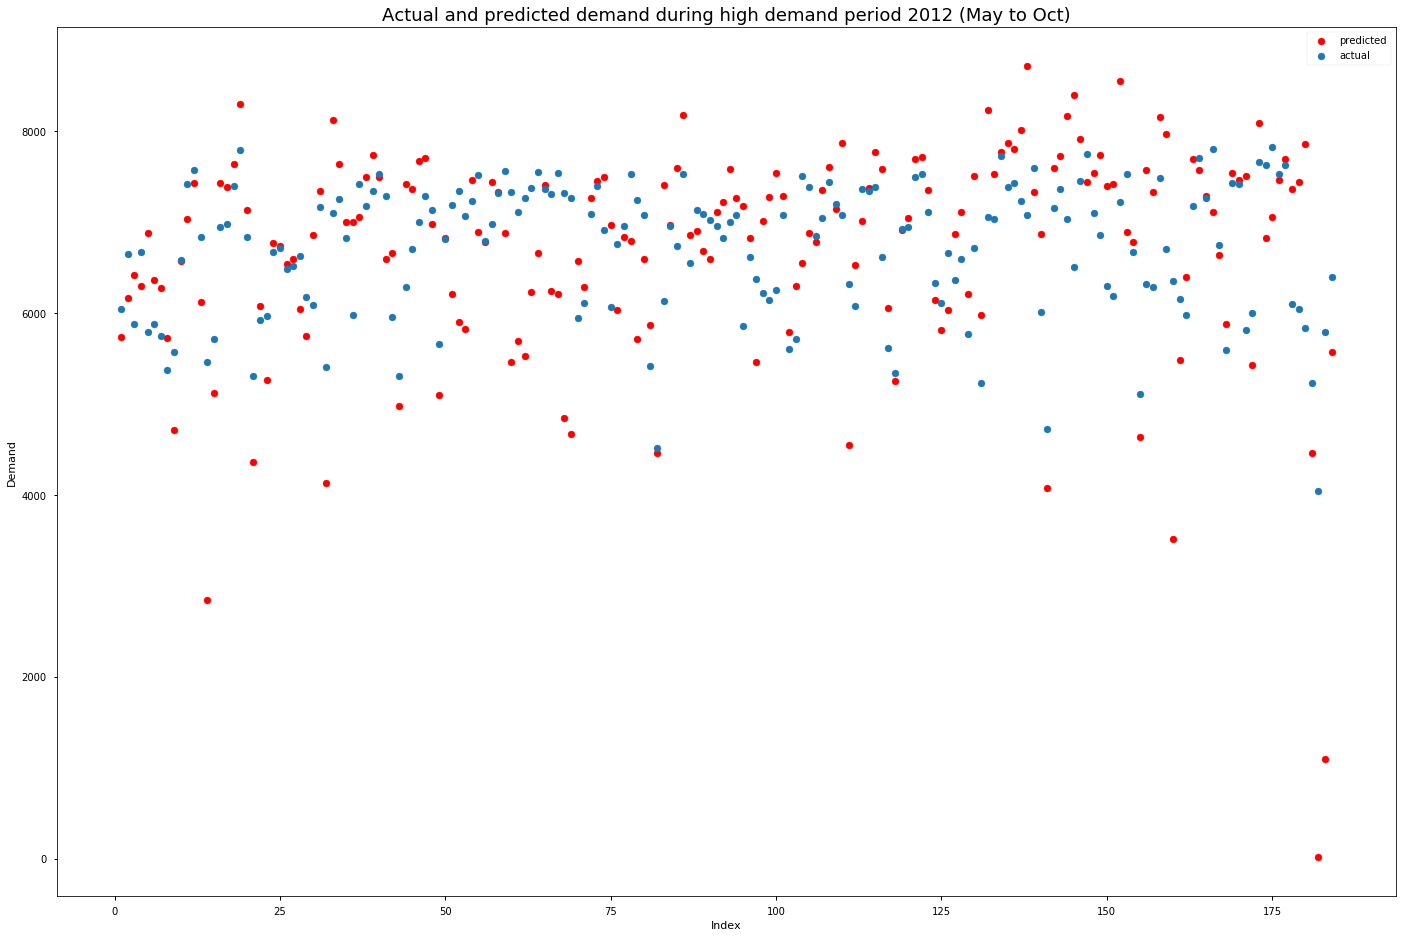

In [171]:
# Regression using only data from Month of May, June, July, August, September and October, using only data for year 2012

# Linear regression object
lm6 = LinearRegression()

# Features
x3 = may_to_oct[may_to_oct['year'] == 1][['season','weather','atemp','humidity','windspeed']]
y3 = may_to_oct[may_to_oct['year'] == 1]['count']

#Regression
lm6.fit(x3, y3)
print("Coefficients:", lm6.coef_)
print("Intercept:", lm6.intercept_)
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)


estimate3 = lm6.predict(x3)

print("R-squared:", skl.metrics.r2_score(y3, estimate3))
print("Mean Squared Error (MSE):", skl.metrics.mean_squared_error(y3, estimate3))


regress_plot3 = plt.figure(figsize=(24,16))

plt.scatter(np.arange(1,185,1),y3, color='red',label ="predicted")
plt.scatter(np.arange(1,185,1),estimate3,label ="actual")
plt.title("Actual and predicted demand during high demand period 2012 (May to Oct)", fontsize = 18)
plt.ylabel("Demand")
plt.xlabel("Index")

plt.legend()
plt.show()

Indeed, the R-squared improves to 0.377 from 0.232 if we only use the data from 2012.

Moreover, from the the plot, we can see that most of the significant errors come from underpredicting. Especially, there is one observation with total number of user = 22, which can be an outlier and may be due variable such as system failure. Therefore, to construct a more accurate models, we might want to exclude those observations from the data set. 

In [173]:
# Linear regression using only data for 2011
# Linear regression object
lm9 = LinearRegression()

# Features
x9 = data_bike[data_bike['year']==0][['season','weather','atemp','humidity','windspeed']]
y9 = data_bike[data_bike['year']==0]['count']

#Regression
lm9.fit(x9, y9)
print("Coefficients:", lm9.coef_)
print("Intercept:", lm9.intercept_)



estimate9 = lm9.predict(x9)
print("R-squared:", skl.metrics.r2_score(y9, estimate9))
print("Mean Squared Error (MSE):", skl.metrics.mean_squared_error(y9, estimate9))

Coefficients: [  367.55009365  -515.08782842  5202.38252379  -658.09387093
 -1993.16758464]
Intercept: 1596.2358158997652
R-squared: 0.753123343734286
Mean Squared Error (MSE): 468017.29922759515


In [172]:
# Linear regression using only data for 2012

# Linear regression object
lm8 = LinearRegression()

# Features
x8 = data_bike[data_bike['year']==1][['season','weather','atemp','humidity','windspeed']]
y8 = data_bike[data_bike['year']==1]['count']

#Regression
lm8.fit(x8, y8)
print("Coefficients:", lm8.coef_)
print("Intercept:", lm8.intercept_)



estimate8 = lm8.predict(x8)
print("R-squared:", skl.metrics.r2_score(y8, estimate8))
print("Mean Squared Error (MSE):", skl.metrics.mean_squared_error(y8, estimate8))

Coefficients: [  450.22533537  -606.50313742  6849.09906564 -1953.00722196
 -2923.80766996]
Intercept: 3756.6303251950585
R-squared: 0.6716977735521408
Mean Squared Error (MSE): 1047478.258534919


Lastly, I tried to re-fit the data set for year 2011 and 2012 separately, using my initial model. As we can see, both models have significantly higher R-squared as compared to our initial model. As we should expect the environmental and seasonal variables to be consistent throughout different years, we have more reason to believe that there are some variables that account for the changes between years. Unless we incorporate such variables into our model, we cannot expect to make any accurate prediction about future sales. 

The models I fitted above are only decent for explaining the trend in the past, to make forward-looking predictions, more variables are required.

<span style="color:blue">

### END OF LINEAR REGRESSION

</span>